# Introduction

Muhammad Bintang Ramadhan  
Data Science Batch 08  
  
Dataset  
source  : https://sofifa.com   

Case:  

An English Premier League Football Club Manager wants to make The Dream Team of future football star players, he was inspired by La Masia FC.Barcelona. The manager's goal is to invest in these young players by giving them lots of games and one day becoming a player of great value when a top club wants to sign him. Thus, he has created a Talent Scouting Team to look for talents in various countries, apart from talent search in other countries, the Club also has an Academy. In fact, on the field often competing for these young talents with other clubs, the clubs compete in contract negotiations. Therefore, I was asked to predict the exact salary range before he negotiated the contract, because if it was predicted before negotiating the manager would get the right range to negotiate.


Objective:  

I will make salary predictions using Machine Learning which studies datasets from https://sofifa.com which contains data on professional football players with features of Wages, Value, and skills of the players. I will try with some regression models.

-   Notes : This is just my imagination and the dataset is from the FIFA playstation game

# Impot Library

In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

#Preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

#Evaluasi Model
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Import Data

In [3]:
# I use a dataset from sofifa.com which contains professional football players with features for wages, values and player skills.
df_ori = pd.read_csv('data.csv') #load data
pd.set_option('display.max_columns', None) # shows data with all columns
df = df_ori.copy() # Data duplication
df.columns= df.columns.str.lower() # rename feature with lowercase
df.columns = df.columns.str.replace(' ','_') # replace space to underscore in features names
df.head(3)

,unnamed:_0,id,name,age,photo,nationality,flag,overall,potential,club,club_logo,value,wage,special,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,position,jersey_number,joined,loaned_from,contract_valid_until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release_clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [4]:
df_ori.head(2)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unnamed:_0                18207 non-null  int64  
 1   id                        18207 non-null  int64  
 2   name                      18207 non-null  object 
 3   age                       18207 non-null  int64  
 4   photo                     18207 non-null  object 
 5   nationality               18207 non-null  object 
 6   flag                      18207 non-null  object 
 7   overall                   18207 non-null  int64  
 8   potential                 18207 non-null  int64  
 9   club                      17966 non-null  object 
 10  club_logo                 18207 non-null  object 
 11  value                     18207 non-null  object 
 12  wage                      18207 non-null  object 
 13  special                   18207 non-null  int64  
 14  prefer

-   The dataset contains 89 features and 18207 data
-   The dataset has 38 features float data, 6 features integer and 45 features object
-   The dataset has features that I will not use, because I think the data is less relevant and the information is already represented by one of the other features.
-  Seen there are some features that have Missing Value. Then it will be checked how much the Missing Value of each feature 

In [6]:
# Check the amount of data and the percentage of missing values in the features
mis = df.isnull().sum() # Number of missing values
misperc = df.isnull().sum() /len(df) *100 # Number of percent missing value
misval = pd.DataFrame({'Missing Value' :mis,'Missing Value %': round(misperc)}) # Number of Missing Values and what percentage of Missing Values into a DataFrame
pd.set_option('display.max_rows', None)
misval[misval['Missing Value'] > 0] # Shows all missing values for each feature

,Missing Value,Missing Value %
club,241,1.0
preferred_foot,48,0.0
international_reputation,48,0.0
weak_foot,48,0.0
skill_moves,48,0.0
work_rate,48,0.0
body_type,48,0.0
real_face,48,0.0
position,60,0.0
jersey_number,60,0.0


Many features have missing values

In [7]:
# Find out the cause of Missing Value
df[df.preferred_foot.isnull()].head()

,unnamed:_0,id,name,age,photo,nationality,flag,overall,potential,club,club_logo,value,wage,special,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,position,jersey_number,joined,loaned_from,contract_valid_until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release_clause
13236,13236,177971,J. McNulty,33,https://cdn.sofifa.org/players/4/19/177971.png,Scotland,https://cdn.sofifa.org/flags/42.png,62,62,Rochdale,https://cdn.sofifa.org/teams/2/light/1955.png,€120K,€1K,1510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,13237,195380,J. Barrera,29,https://cdn.sofifa.org/players/4/19/195380.png,Nicaragua,https://cdn.sofifa.org/flags/86.png,62,62,Boyacá Chicó FC,https://cdn.sofifa.org/teams/2/light/112019.png,€300K,€1K,1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,13238,139317,J. Stead,35,https://cdn.sofifa.org/players/4/19/139317.png,England,https://cdn.sofifa.org/flags/14.png,62,62,Notts County,https://cdn.sofifa.org/teams/2/light/1937.png,€140K,€3K,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,13239,240437,A. Semprini,20,https://cdn.sofifa.org/players/4/19/240437.png,Italy,https://cdn.sofifa.org/flags/27.png,62,72,Brescia,https://cdn.sofifa.org/teams/2/light/190.png,€425K,€1K,1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,13240,209462,R. Bingham,24,https://cdn.sofifa.org/players/4/19/209462.png,England,https://cdn.sofifa.org/flags/14.png,62,66,Hamilton Academical FC,https://cdn.sofifa.org/teams/2/light/184.png,€400K,€1K,1481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-   I think only lesser known players, so those players have no data

In [8]:
df.describe()

,unnamed:_0,id,age,overall,potential,special,international_reputation,weak_foot,skill_moves,jersey_number,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [9]:
df.describe(include=object)

,name,photo,nationality,flag,club,club_logo,value,wage,preferred_foot,work_rate,body_type,real_face,position,joined,loaned_from,contract_valid_until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,release_clause
count,18207,18207,18207,18207,17966,18207,18207,18207,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,17194,18207,164,164,651,679,217,144,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,J. Rodríguez,https://cdn.sofifa.org/players/4/19/158023.png,England,https://cdn.sofifa.org/flags/14.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€1.1M,€1K,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,11,1,1662,1662,33,33,431,4900,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


In [10]:
def toFloat(string):
    """Function to convert Wage and Value strings to floats"""
    string = string.strip(" ")
    if string[-1] == 'M':
        return float(string[1:-1]) * 1000000
    elif string[-1] == 'K':
        return float(string[1:-1]) * 1000
    else:
        return float(string[1:])

In [11]:
df['value'] = [toFloat(value) for value in df['value']]
df['wage'] = [toFloat(wage) for wage in df['wage']]

In [12]:
# feet to cm
df['height'] = df['height'].str.replace("'",'.').astype(float) * 30.48
# pound to kg
df['weight'] = df['weight'].str.replace("lbs",'').astype(float) / 2.205

df['height'] = np.round(df['height'])
df['weight'] = np.round(df['weight'])

df[['height','weight']].head()

,height,weight
0,174.0,72.0
1,189.0,83.0
2,180.0,68.0
3,195.0,76.0
4,156.0,70.0


# EDA Visualisasi

In [13]:
 def scatplot(plot,x1,y1,x2,y2,x3,y3): 
    plt.rcParams['figure.figsize'] = (20,8)

    plt.subplot(1,3,1)
    plot(x1,y1, color='red')

    plt.subplot(1,3,2)
    plot(x2,y2, color='blue')

    plt.subplot(1,3,3)
    plot(x3,y3, color='green')

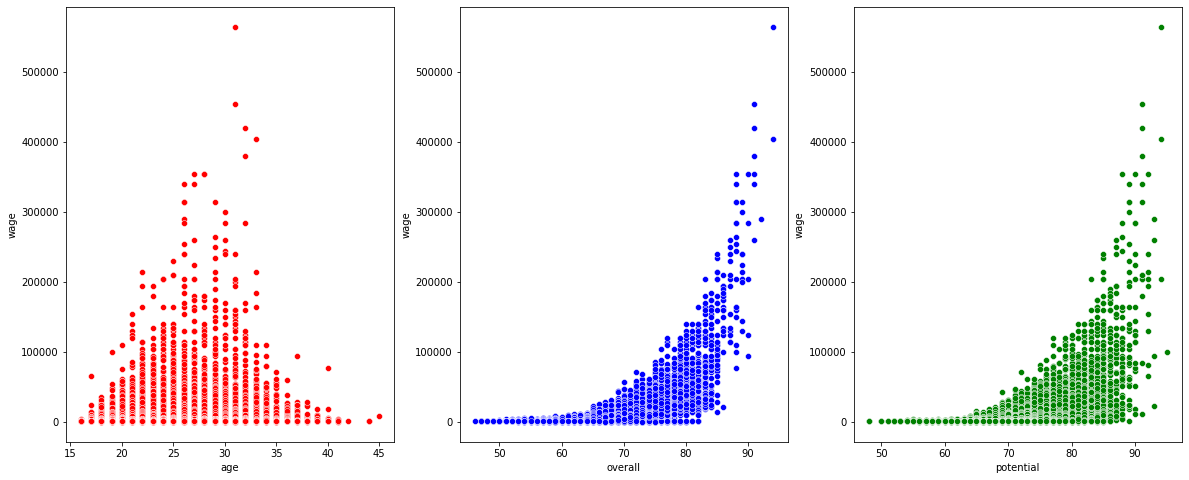

In [14]:
scatplot(sns.scatterplot, df['age'],df['wage'],df['overall'],df['wage'],df['potential'],df['wage'])

-   Looking at the scatterplot between age and wage, I conclude that the ones with the highest wages are athletes who are in their golden age between 23-30. It makes sense because at the age of around 23-30 athletes are usually fit or at their top performance. So, here it is very relevant when the overall and potential of the athlete is high, their salary is also high. 
  
*  
Overall is the rating of the player's ability, has a rating between 0-100.  
Potential is the talent rating of the player's ability, having a rating between 0-100. rating how great he will be in the future.

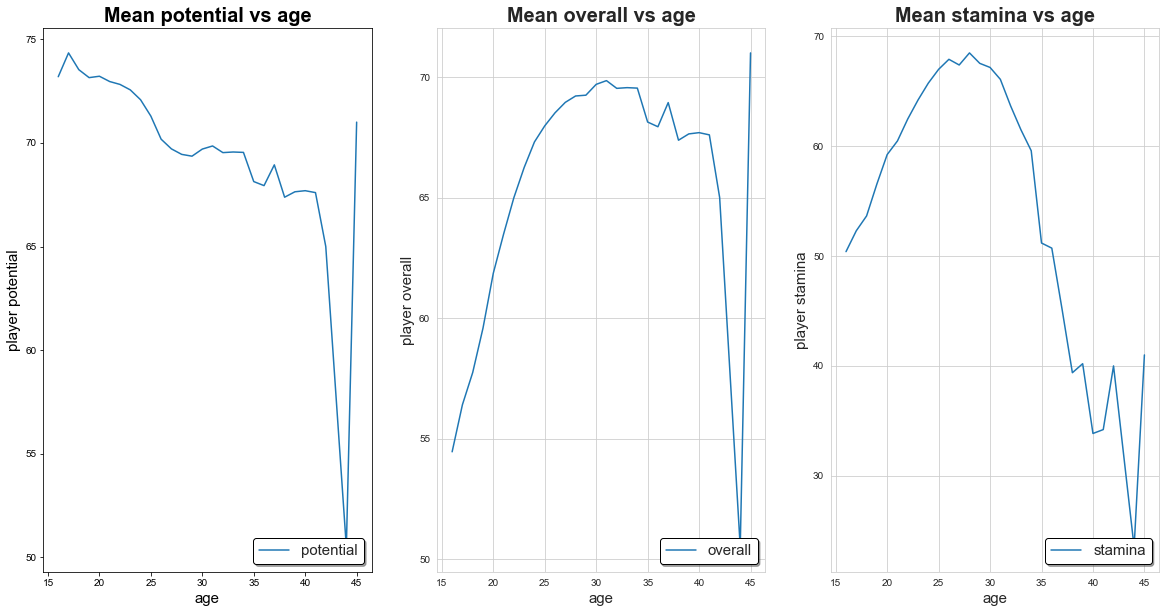

In [15]:
plt.figure(figsize=(20,10))

# mean potential Vs age
plt.subplot(1,3,1)
age1 = df.sort_values("age")['age'].unique()
potential = df.groupby("age")["potential"].mean().values
plt.title('Mean potential vs age', fontsize=20, fontweight='bold')
plt.xlabel('age', fontsize=15)
plt.ylabel('player potential', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age1, potential, label="potential")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")


# mean overall VS age
plt.subplot(1,3,2)
age2 = df.sort_values("age")['age'].unique()
overall = df.groupby("age")["overall"].mean().values
plt.title('Mean overall vs age', fontsize=20, fontweight='bold')
plt.xlabel('age', fontsize=15)
plt.ylabel('player overall', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age2, overall, label="overall")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")


# mean Stamina VS age
plt.subplot(1,3,3)
age3 = df.sort_values("age")['age'].unique()
stamina = df.groupby("age")["stamina"].mean().values
plt.title('Mean stamina vs age', fontsize=20, fontweight='bold')
plt.xlabel('age', fontsize=15)
plt.ylabel('player stamina', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age3, stamina, label="stamina")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

From the plots above, I conclude that in the world of professional athletes "Age is Just a Number" does not generally apply, it can be seen that the older one's stamina and ability will decrease their performance. But if you look at the lineplot after going down and then up again, maybe it's only a few people who can maintain their body condition to stay fit and stay in top performance.

In [16]:
# Maean player potential score per country
country_potential = df.groupby("nationality")["potential"].mean()
country_potential = country_potential.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_potential['nationality'],
        z = country_potential['potential'],
        colorscale = [[65,"rgb(5, 10, 172)"],[67,"rgb(40, 60, 190)"],[69,"rgb(70, 100, 245)"],\
            [71,"rgb(90, 120, 245)"],[73,"rgb(106, 137, 247)"],[75,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Mean<br>Potential Score'),
    ) ]

layout = dict(
    title = 'Mean Player Potential',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False )

In the talent search Talent Scouting Team often looks to other countries. Based on this dataset, I try to recommend which countries have football talents, by calculating the average potential professional players from each country, but plotting the data only applies to countries whose players play in the top leagues. because in this dataset there are only players from some of the highest football leagues, so for countries that donate a few players to the top leagues it looks like they have a high mean potential value, even though it is because of the average count of only a few people.

# Data Preprocessing

## Get Data Inference

In [17]:
#For data inference, take ten talented young players to predict their salary
talent_player = df[
    (df['age'] <= 18)& 
    (df['potential'] >= 80)
].head(10)

In [18]:
# Deleting Inference data from the dataset
df = df.drop(talent_player.index)
df.head()

,unnamed:_0,id,name,age,photo,nationality,flag,overall,potential,club,club_logo,value,wage,special,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,position,jersey_number,joined,loaned_from,contract_valid_until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release_clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,174.0,72.0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,189.0,83.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,180.0,68.0,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,195.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,156.0,70.0,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [20]:
# Reset index for dataset and data inference
df.reset_index(drop=True, inplace=True)
talent_player.reset_index(drop=True, inplace=True)

## Feature Selection

<AxesSubplot:>

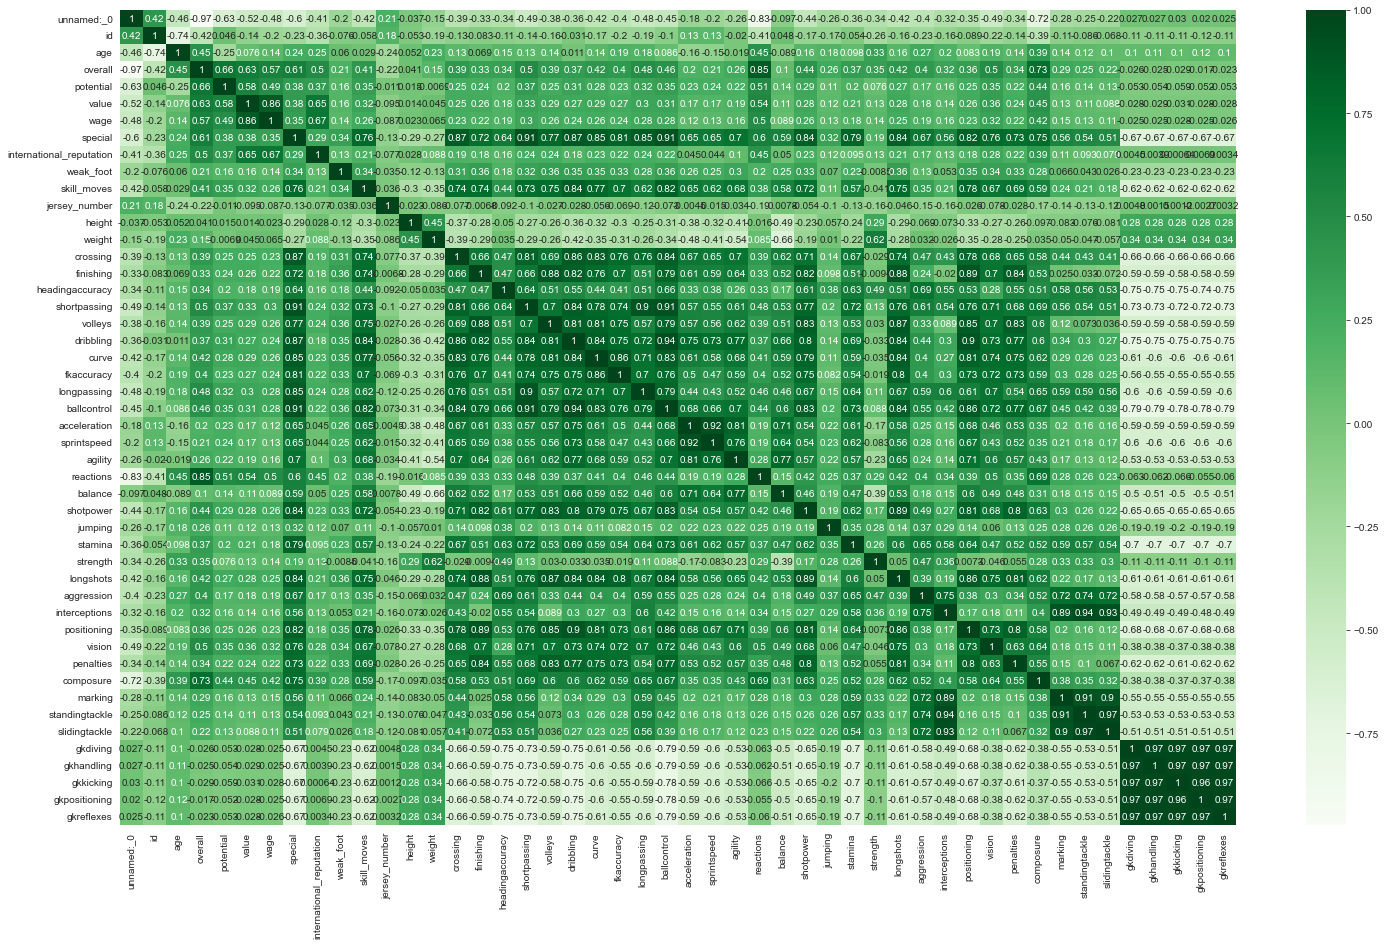

In [21]:
plt.rcParams['figure.figsize'] = (25,15)
sns.heatmap(df.corr(), cmap='Greens', annot=True)

In [22]:
corr_matrix=df.corr()
corr_matrix["wage"].sort_values(ascending=False)

wage                        1.000000
value                       0.858927
international_reputation    0.669009
overall                     0.571932
reactions                   0.495523
potential                   0.486578
composure                   0.419429
special                     0.347723
vision                      0.315237
shortpassing                0.296584
ballcontrol                 0.277373
longpassing                 0.276905
skill_moves                 0.262763
curve                       0.259286
shotpower                   0.258161
volleys                     0.257139
longshots                   0.248924
dribbling                   0.236881
fkaccuracy                  0.236286
crossing                    0.232705
positioning                 0.226487
penalties                   0.222279
finishing                   0.217139
aggression                  0.194787
headingaccuracy             0.188105
stamina                     0.177425
interceptions               0.157683
a

Based on the correlation heatmap, there are many features that have a correlation to wage, but there are some features that I will drop features because they do not provide good information.

In [23]:
# I removed some numeric features which I found uninformative
numerics = ['int64', 'float64']
num = df.select_dtypes(include=numerics)
num.drop(columns=['unnamed:_0', 'id', 'special', 'jersey_number','gkhandling', 'gkpositioning', 'gkdiving', 'gkreflexes', 'gkkicking'],inplace=True)
num.head()

,age,overall,potential,value,wage,international_reputation,weak_foot,skill_moves,height,weight,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle
0,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,174.0,72.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,189.0,83.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,26,92,93,118500000.0,290000.0,5.0,5.0,5.0,180.0,68.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,195.0,76.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,27,91,92,102000000.0,355000.0,4.0,5.0,4.0,156.0,70.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


In [24]:
# I only use categorical features is preferred foot
cat = df[['preferred_foot']]
cat.head()

,preferred_foot
0,Left
1,Right
2,Right
3,Right
4,Right


In [25]:
fifa = pd.concat([cat,num], axis=1)
fifa.head()

,preferred_foot,age,overall,potential,value,wage,international_reputation,weak_foot,skill_moves,height,weight,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle
0,Left,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,174.0,72.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,Right,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,189.0,83.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,Right,26,92,93,118500000.0,290000.0,5.0,5.0,5.0,180.0,68.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,Right,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,195.0,76.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,Right,27,91,92,102000000.0,355000.0,4.0,5.0,4.0,156.0,70.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


## Train Test Split

In [26]:
# Splitting Dataset using sklearn train_test_split
# Split for 70% train and 30% test data
from sklearn.model_selection import train_test_split

train, test = train_test_split(fifa, test_size=0.3, random_state=8)

print(train.shape)
print(test.shape)

(12737, 40)
(5460, 40)


## Handling Missing Value

In [27]:
# Check the amount of data and the percentage of missing values in the features
mis = fifa.isnull().sum() # Number of missing values
misperc = fifa.isnull().sum() /len(fifa) *100 # Number of percent missing value
misval = pd.DataFrame({'Missing Value' :mis,'Missing Value %': round(misperc)}) # Number of Missing Values and what percentage of Missing Values into a DataFrame
pd.set_option('display.max_rows', None)
misval[misval['Missing Value'] > 0] # Shows all missing values for each feature

,Missing Value,Missing Value %
preferred_foot,48,0.0
international_reputation,48,0.0
weak_foot,48,0.0
skill_moves,48,0.0
height,48,0.0
weight,48,0.0
crossing,48,0.0
finishing,48,0.0
headingaccuracy,48,0.0
shortpassing,48,0.0


Because the Missing Value of each feature is only below 5%, I will handle the missing value by deleting the data

In [25]:
# drop data or delete missing value data
train.dropna(inplace=True)
print(train.isnull().sum())

test.dropna(inplace=True)
print(test.isnull().sum())

preferred_foot              0
age                         0
overall                     0
potential                   0
value                       0
wage                        0
international_reputation    0
weak_foot                   0
skill_moves                 0
height                      0
weight                      0
crossing                    0
finishing                   0
headingaccuracy             0
shortpassing                0
volleys                     0
dribbling                   0
curve                       0
fkaccuracy                  0
longpassing                 0
ballcontrol                 0
acceleration                0
sprintspeed                 0
agility                     0
reactions                   0
balance                     0
shotpower                   0
jumping                     0
stamina                     0
strength                    0
longshots                   0
aggression                  0
interceptions               0
positionin

## Handling Outliers

### Identify Outliers

In [28]:
#function histplot dan boxplot untuk melihat distribusi data
def identify_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Plot 1 Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Plot 2 Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

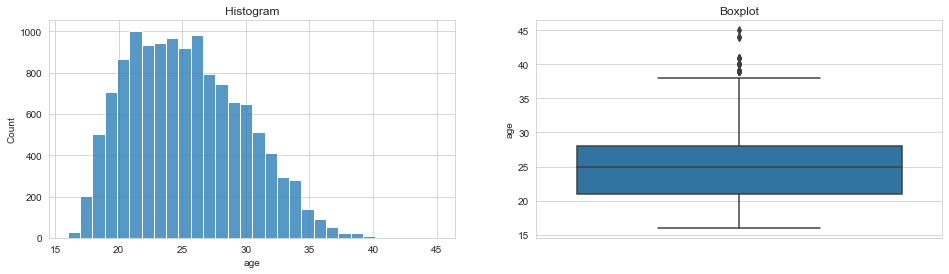

Skewness Value :  0.39640563276771146



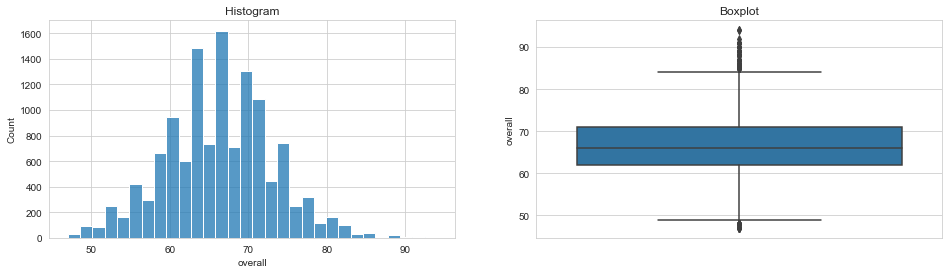

Skewness Value :  0.07491408929024751



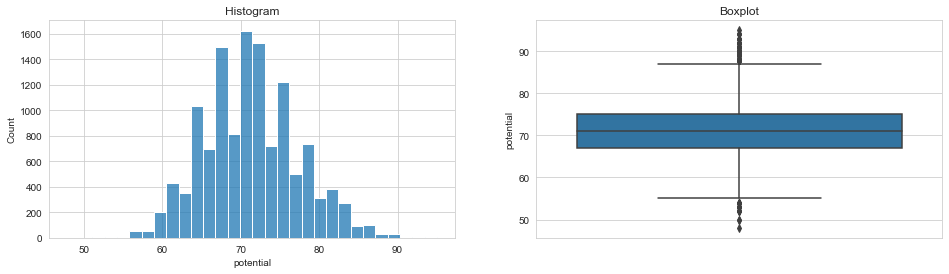

Skewness Value :  0.2638633108664426



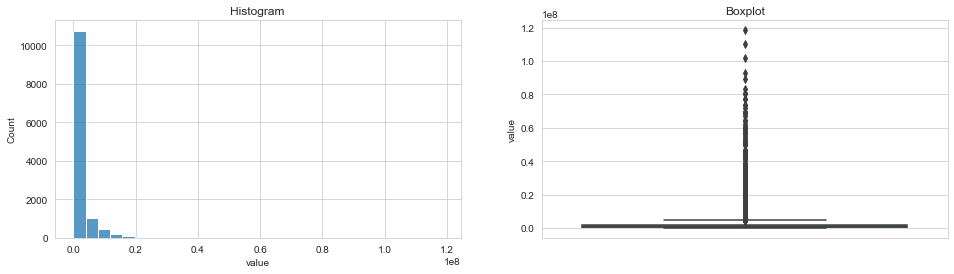

Skewness Value :  7.5820396609089595



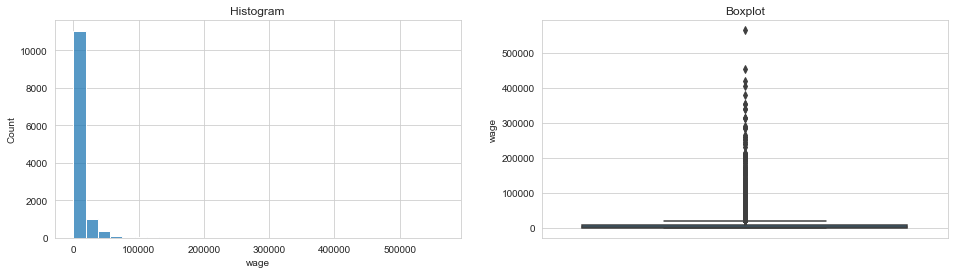

Skewness Value :  8.507302747482086



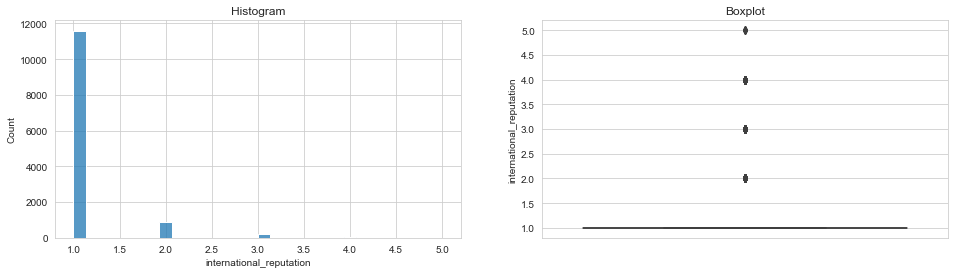

Skewness Value :  4.136512006772388



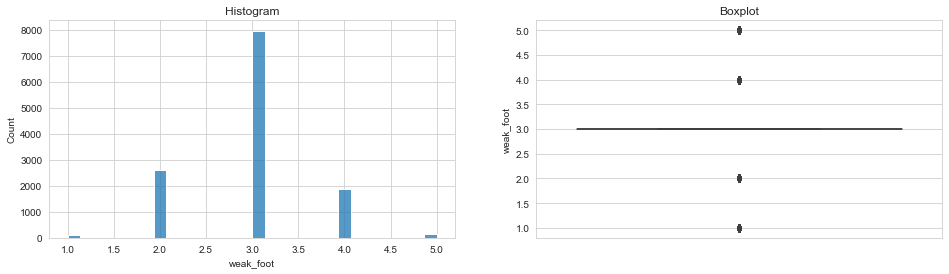

Skewness Value :  0.13677836613349226



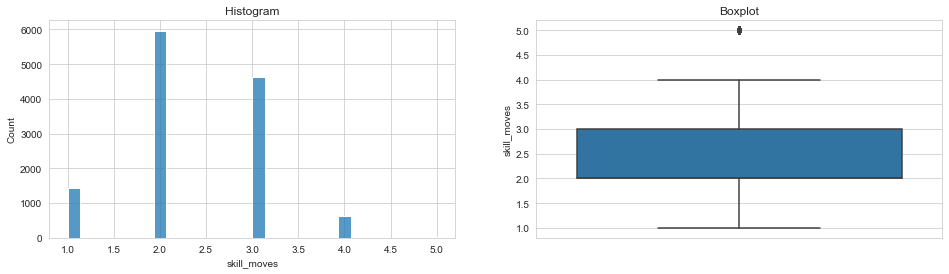

Skewness Value :  0.14014197856449326



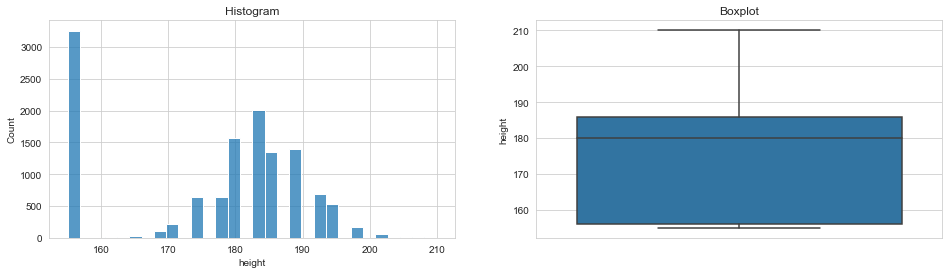

Skewness Value :  -0.5663115608225773



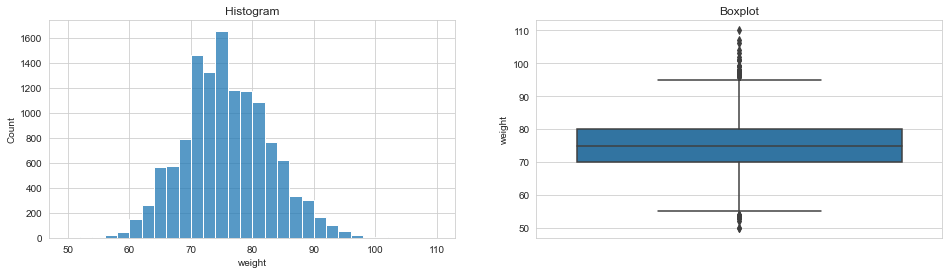

Skewness Value :  0.21363089384888406



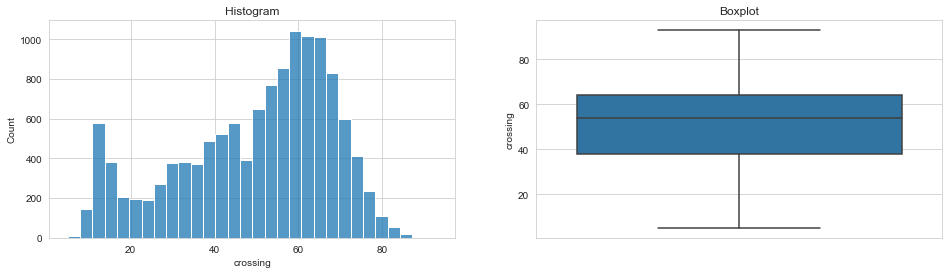

Skewness Value :  -0.5970835105204498



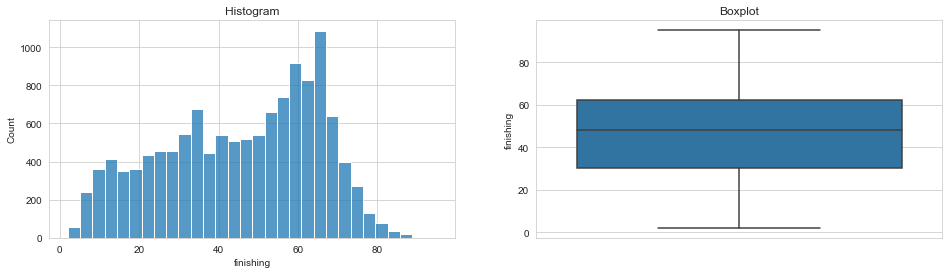

Skewness Value :  -0.28792090439168305



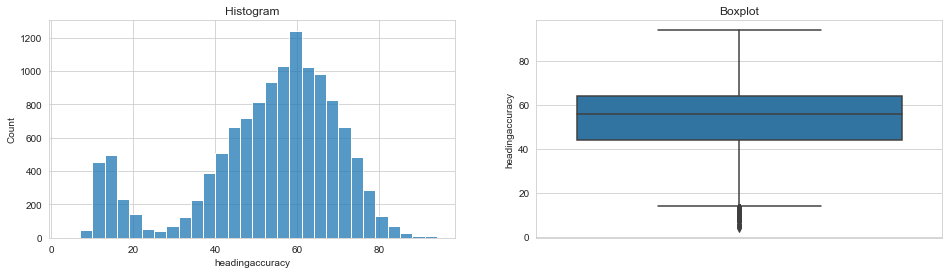

Skewness Value :  -0.8829112803634889



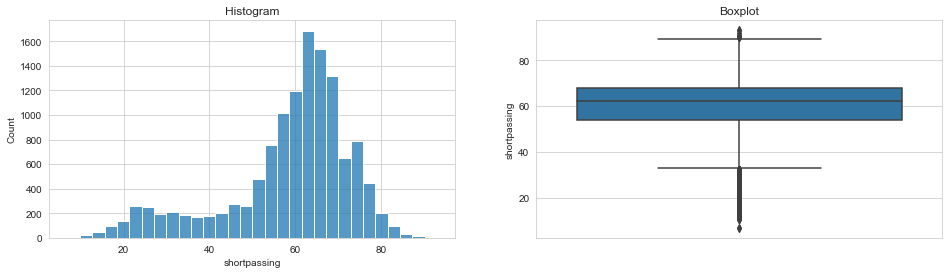

Skewness Value :  -1.1085489813467715



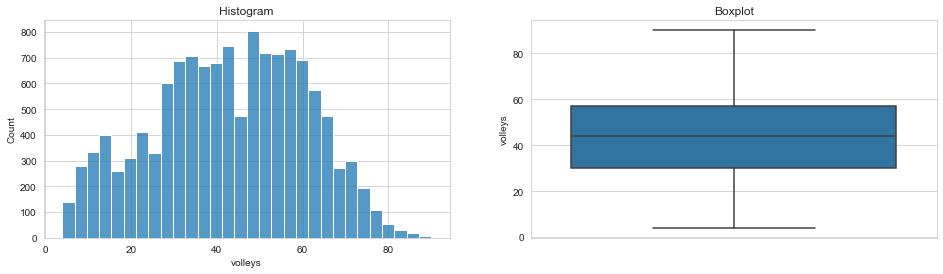

Skewness Value :  -0.14238542024737874



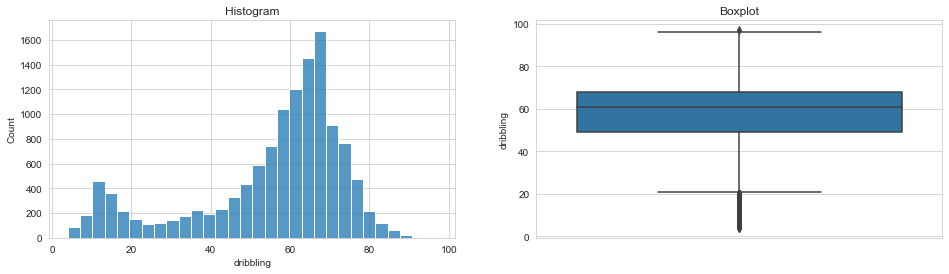

Skewness Value :  -1.0843624923255677



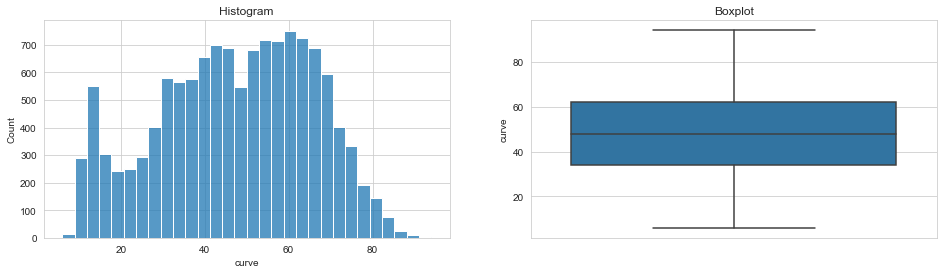

Skewness Value :  -0.23423799261634135



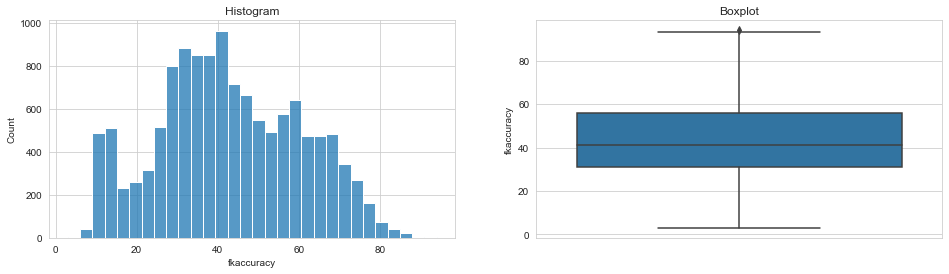

Skewness Value :  0.10086136861937554



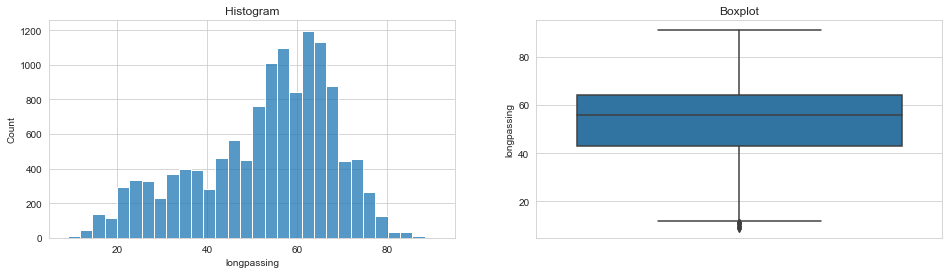

Skewness Value :  -0.606032183662784



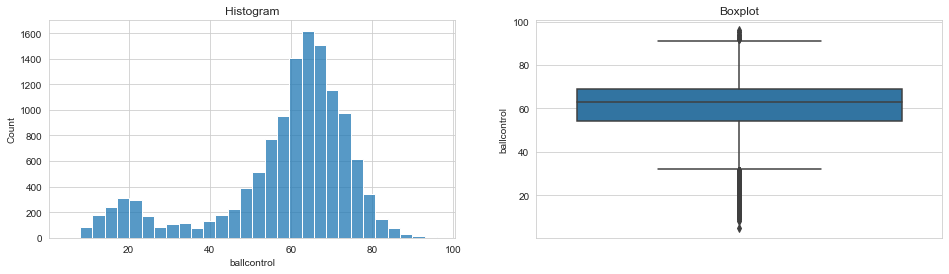

Skewness Value :  -1.2703262973203435



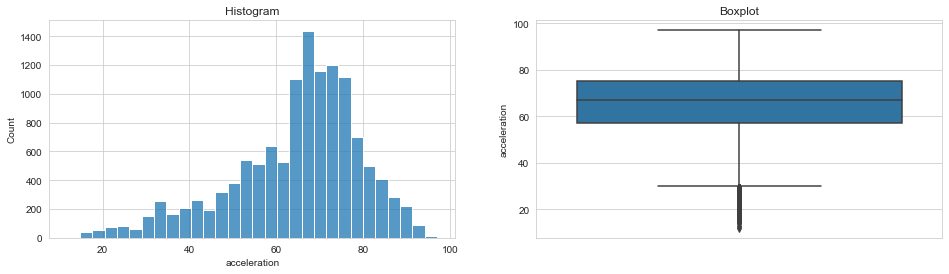

Skewness Value :  -0.8165720836272083



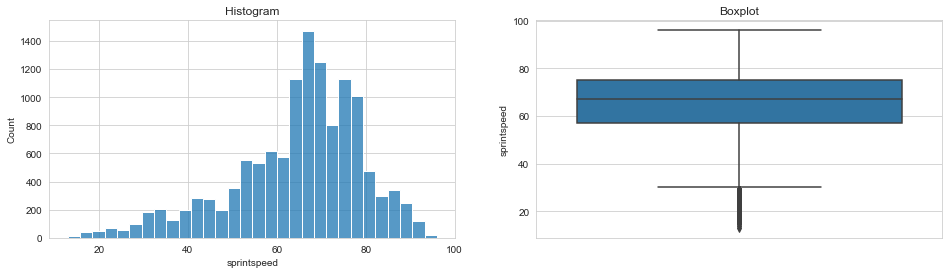

Skewness Value :  -0.8223632581566027



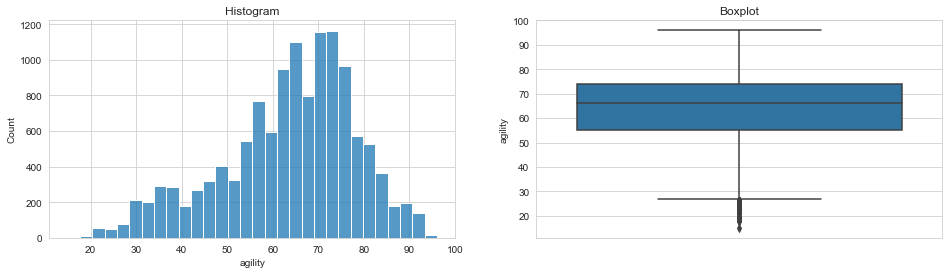

Skewness Value :  -0.6005416426518869



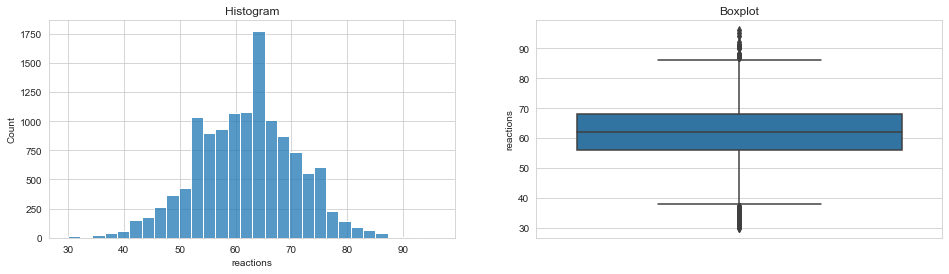

Skewness Value :  -0.10852772750376545



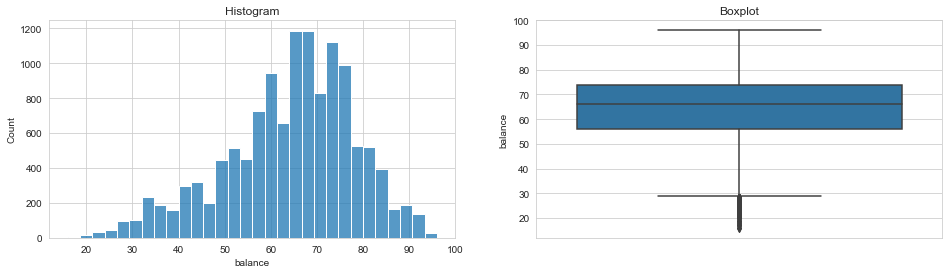

Skewness Value :  -0.5748029064024329



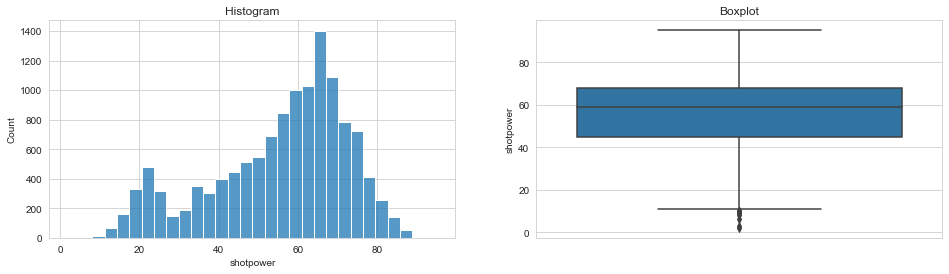

Skewness Value :  -0.677798291420445



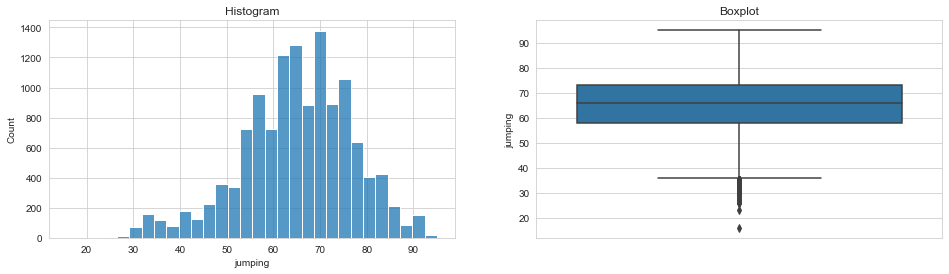

Skewness Value :  -0.46542388080365577



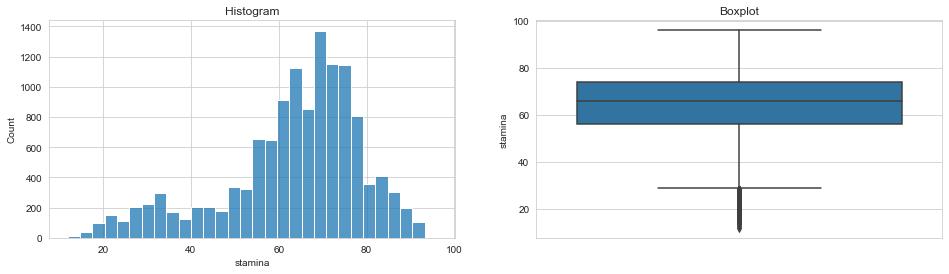

Skewness Value :  -0.9069975443833518



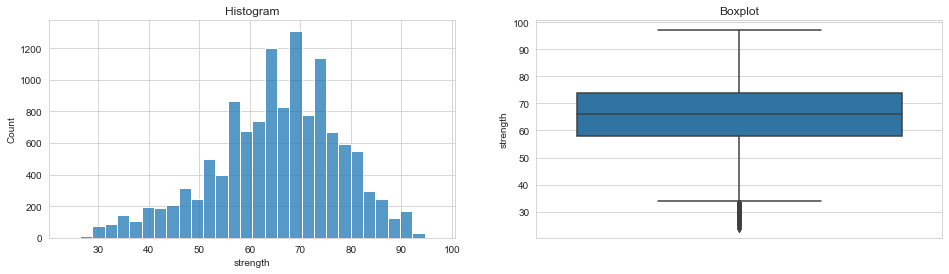

Skewness Value :  -0.4695485455886807



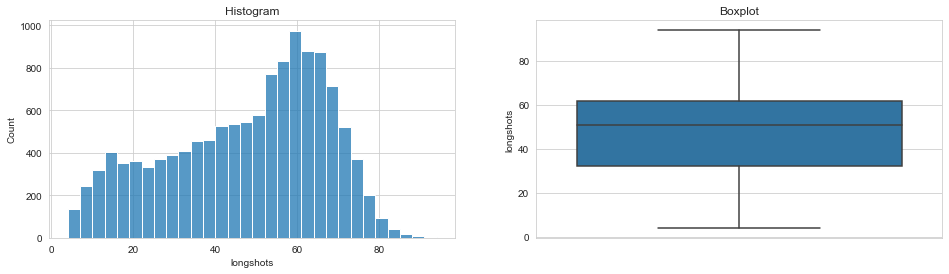

Skewness Value :  -0.4268409534410427



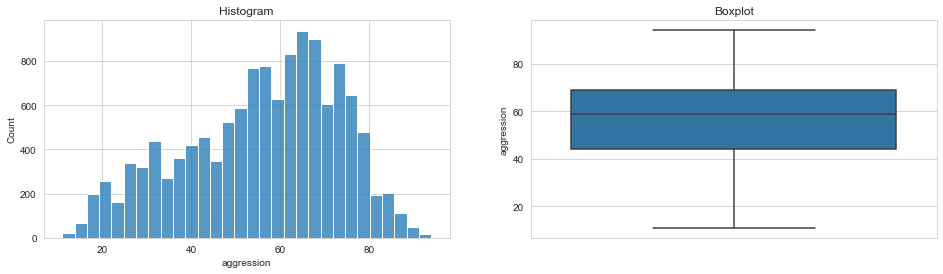

Skewness Value :  -0.4334047287741844



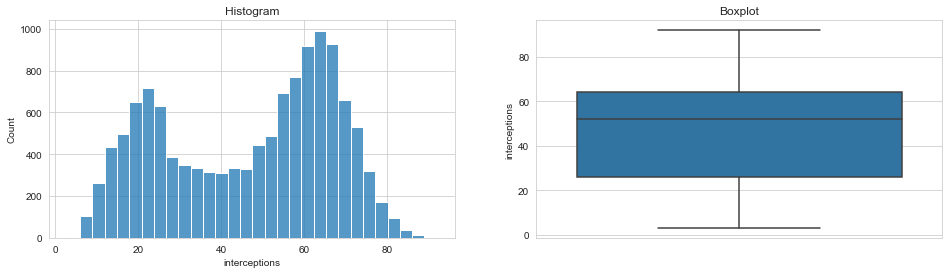

Skewness Value :  -0.27028197172866847



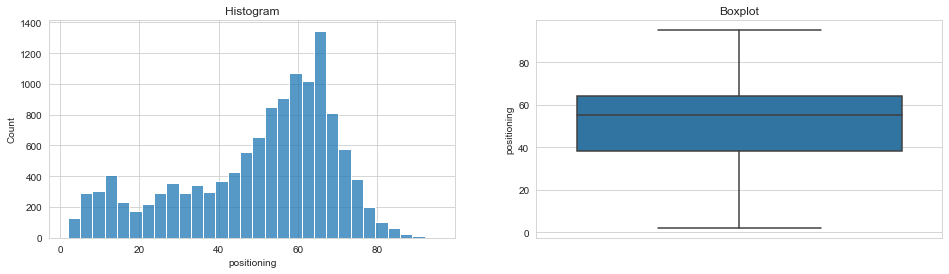

Skewness Value :  -0.713280089486152



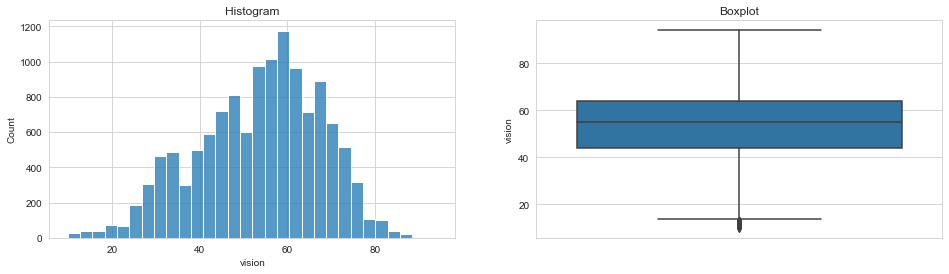

Skewness Value :  -0.35466201723256596



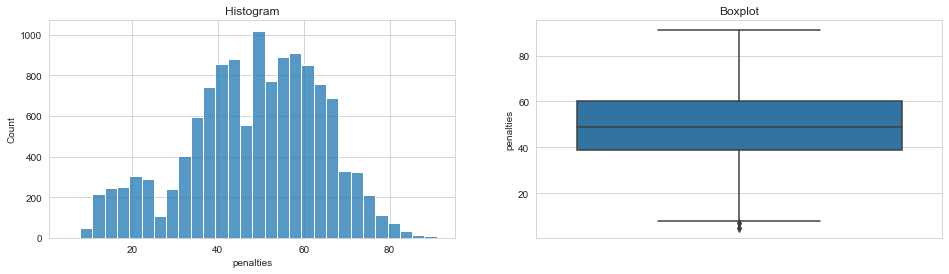

Skewness Value :  -0.3478278370315189



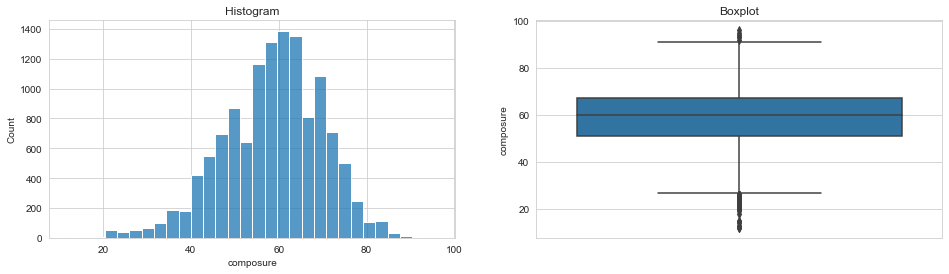

Skewness Value :  -0.4039516343005049



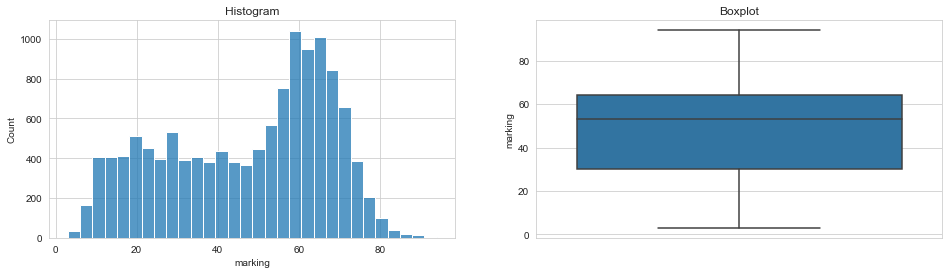

Skewness Value :  -0.3748415569560303



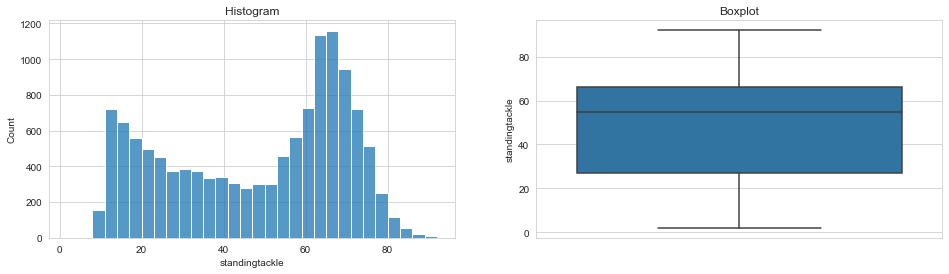

Skewness Value :  -0.33842534707256333



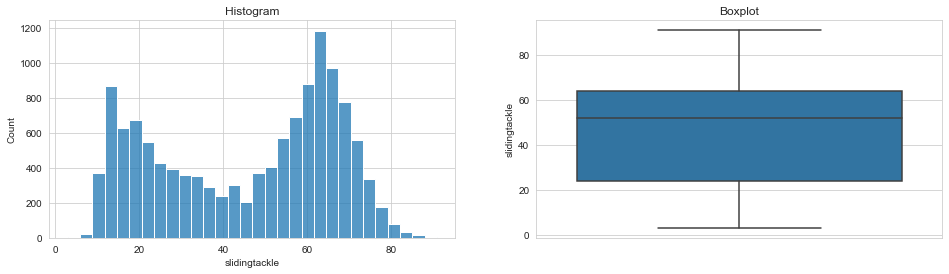

Skewness Value :  -0.26843841821171066



In [29]:
for var in train.select_dtypes(np.number): # Looping all Numerical train data
    identify_plots(train, var)
    print('Skewness Value : ', train[var].skew()) # The skewness value of each numeric data
    print()

### Outliers Detection

In [28]:
#Membuat function untuk menemukan batas atas dan batas bawah menggunakan mean +- 3 * standard deviasi.
def find_normal_boundaries(df, variable):
    upper_boundary_normal = df[variable].mean() + 3 * df[variable].std() # batas atas normal
    lower_boundary_normal = df[variable].mean() - 3 * df[variable].std() # batas bawah normal

    return upper_boundary_normal, lower_boundary_normal

In [29]:
#Membuat function untuk menemukan batas atas dan batas bawah menggunakan IQR
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25) #IQR = Q3 - Q1

    lower_boundary_skew = df[variable].quantile(0.25) - (IQR * distance) #batas bawah skew
    upper_boundary_skew = df[variable].quantile(0.75) + (IQR * distance) #batas atas skew

    return upper_boundary_skew, lower_boundary_skew

#### Outliers Detection Gaussian

##### age

In [30]:
# Melihat batas atas dan batas bawah variable age
age_upper_boundary_normal, age_lower_boundary_normal = find_normal_boundaries(train, 'age')
age_upper_boundary_normal, age_lower_boundary_normal

(39.16020702324202, 11.118064795440596)

In [31]:
# Melihat jumlah dan percent data outliers variable age
print('Jumlah data age diatas 39   : {}'.format(len(train[train['age'] > age_upper_boundary_normal])))
print('Jumlah data age dibawah 11   : {}'.format(len(train[train['age'] < age_lower_boundary_normal])))
print()
print('% Jumlah data age diatas 39 : {}'.format(len(train[train['age'] > age_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data age dibawah 11 : {}'.format(len(train[train['age'] < age_lower_boundary_normal])/len(train) * 100))

Jumlah data age diatas 39   : 14
Jumlah data age dibawah 11   : 0

% Jumlah data age diatas 39 : 0.11017549382230267
% Jumlah data age dibawah 11 : 0.0


Terdapat 14 data outliers atau 0.1% Outliers pada variable age, maka akan dilakukan trimming

##### overall

In [32]:
# Melihat batas atas dan batas bawah variable overall
overall_upper_boundary_normal, overall_lower_boundary_normal = find_normal_boundaries(train, 'overall')
overall_upper_boundary_normal, overall_lower_boundary_normal

(86.85598663193471, 45.69599259211503)

In [33]:
# Melihat jumlah dan percent data outliers variable overall
print('Jumlah data overall diatas 86   : {}'.format(len(train[train['overall'] > overall_upper_boundary_normal])))
print('Jumlah data overall dibawah 45   : {}'.format(len(train[train['overall'] < overall_lower_boundary_normal])))
print()
print('% Jumlah data overall diatas 86 : {}'.format(len(train[train['overall'] > overall_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data overall dibawah 45 : {}'.format(len(train[train['overall'] < overall_lower_boundary_normal])/len(train) * 100))

Jumlah data overall diatas 86   : 44
Jumlah data overall dibawah 45   : 0

% Jumlah data overall diatas 86 : 0.34626583772723696
% Jumlah data overall dibawah 45 : 0.0


Terdapat 44 data outliers atau 0.3% Outliers pada variable overall, maka akan dilakukan trimming

##### potential

In [34]:
# Melihat batas atas dan batas bawah variable potential
potential_upper_boundary_normal, potential_lower_boundary_normal = find_normal_boundaries(train, 'potential')
potential_upper_boundary_normal, potential_lower_boundary_normal

(89.61384992431552, 53.04531431586706)

In [35]:
# Melihat jumlah dan percent data outliers variable potential
print('Jumlah data potential diatas 89   : {}'.format(len(train[train['potential'] > potential_upper_boundary_normal])))
print('Jumlah data potential dibawah 53   : {}'.format(len(train[train['potential'] < potential_lower_boundary_normal])))
print()
print('% Jumlah data potential diatas 89 : {}'.format(len(train[train['potential'] > potential_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data potential dibawah 53 : {}'.format(len(train[train['potential'] < potential_lower_boundary_normal])/len(train) * 100))

Jumlah data potential diatas 89   : 35
Jumlah data potential dibawah 53   : 12

% Jumlah data potential diatas 89 : 0.2754387345557567
% Jumlah data potential dibawah 53 : 0.09443613756197372


Terdapat 47 data outliers atau 0.3% Outliers pada variable potential, maka akan dilakukan trimming

##### height


In [36]:
# Melihat batas atas dan batas bawah variable height
height_upper_boundary_normal, height_lower_boundary_normal = find_normal_boundaries(train, 'height')
height_upper_boundary_normal, height_lower_boundary_normal

(217.8899913487291, 135.54890060059017)

In [37]:
# Melihat jumlah dan percent data outliers variable height
print('Jumlah data height diatas 217   : {}'.format(len(train[train['height'] > height_upper_boundary_normal])))
print('Jumlah data height dibawah 135   : {}'.format(len(train[train['height'] < height_lower_boundary_normal])))
print()
print('% Jumlah data height diatas 217 : {}'.format(len(train[train['height'] > height_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data height dibawah 135 : {}'.format(len(train[train['height'] < height_lower_boundary_normal])/len(train) * 100))

Jumlah data height diatas 217   : 0
Jumlah data height dibawah 135   : 0

% Jumlah data height diatas 217 : 0.0
% Jumlah data height dibawah 135 : 0.0


##### weight

In [38]:
# Melihat batas atas dan batas bawah variable weight
weight_upper_boundary_normal, weight_lower_boundary_normal = find_normal_boundaries(train, 'weight')
weight_upper_boundary_normal, weight_lower_boundary_normal

(96.57206278114714, 54.009978613359834)

In [39]:
# Melihat jumlah dan percent data outliers variable weight
print('Jumlah data weight diatas 96   : {}'.format(len(train[train['weight'] > weight_upper_boundary_normal])))
print('Jumlah data weight dibawah 54   : {}'.format(len(train[train['weight'] < weight_lower_boundary_normal])))
print()
print('% Jumlah data weight diatas 96 : {}'.format(len(train[train['weight'] > weight_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data weight dibawah 135 : {}'.format(len(train[train['weight'] < weight_lower_boundary_normal])/len(train) * 100))

Jumlah data weight diatas 96   : 26
Jumlah data weight dibawah 54   : 13

% Jumlah data weight diatas 96 : 0.2046116313842764
% Jumlah data weight dibawah 135 : 0.1023058156921382


Terdapat 39 data outliers atau 0.3% Outliers pada variable weight, maka akan dilakukan trimming

##### crossing

In [40]:
# Melihat batas atas dan batas bawah variable crossing
crossing_upper_boundary_normal, crossing_lower_boundary_normal = find_normal_boundaries(train, 'crossing')
crossing_upper_boundary_normal, crossing_lower_boundary_normal

(104.81044443917347, -5.388550994615336)

In [41]:
# Melihat jumlah dan percent data outliers variable crossing
print('Jumlah data crossing diatas 104   : {}'.format(len(train[train['crossing'] > crossing_upper_boundary_normal])))
print('Jumlah data crossing dibawah -5   : {}'.format(len(train[train['crossing'] < crossing_lower_boundary_normal])))
print()
print('% Jumlah data crossing diatas 104 : {}'.format(len(train[train['crossing'] > crossing_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data crossing dibawah -5 : {}'.format(len(train[train['crossing'] < crossing_lower_boundary_normal])/len(train) * 100))

Jumlah data crossing diatas 104   : 0
Jumlah data crossing dibawah -5   : 0

% Jumlah data crossing diatas 104 : 0.0
% Jumlah data crossing dibawah -5 : 0.0


##### finishing

In [42]:
# Melihat batas atas dan batas bawah variable finishing
finishing_upper_boundary_normal, finishing_lower_boundary_normal = find_normal_boundaries(train, 'finishing')
finishing_upper_boundary_normal, finishing_lower_boundary_normal

(104.14395491921454, -13.23516448874313)

In [43]:
# Melihat jumlah dan percent data outliers variable finishing
print('Jumlah data finishing diatas 104   : {}'.format(len(train[train['finishing'] > finishing_upper_boundary_normal])))
print('Jumlah data finishing dibawah -13   : {}'.format(len(train[train['finishing'] < finishing_lower_boundary_normal])))
print()
print('% Jumlah data finishing diatas 104 : {}'.format(len(train[train['finishing'] > finishing_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data finishing dibawah -13 : {}'.format(len(train[train['finishing'] < finishing_lower_boundary_normal])/len(train) * 100))

Jumlah data finishing diatas 104   : 0
Jumlah data finishing dibawah -13   : 0

% Jumlah data finishing diatas 104 : 0.0
% Jumlah data finishing dibawah -13 : 0.0


##### curve

In [44]:
# Melihat batas atas dan batas bawah variable curve
curve_upper_boundary_normal, curve_lower_boundary_normal = find_normal_boundaries(train, 'curve')
curve_upper_boundary_normal, curve_lower_boundary_normal

(102.25095434575934, -8.161869589325867)

In [45]:
# Melihat jumlah dan percent data outliers variable curve
print('Jumlah data curve diatas 104   : {}'.format(len(train[train['curve'] > curve_upper_boundary_normal])))
print('Jumlah data curve dibawah -13   : {}'.format(len(train[train['curve'] < curve_lower_boundary_normal])))
print()
print('% Jumlah data curve diatas 104 : {}'.format(len(train[train['curve'] > curve_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data curve dibawah -13 : {}'.format(len(train[train['curve'] < curve_lower_boundary_normal])/len(train) * 100))

Jumlah data curve diatas 104   : 0
Jumlah data curve dibawah -13   : 0

% Jumlah data curve diatas 104 : 0.0
% Jumlah data curve dibawah -13 : 0.0


##### fkaccuracy

In [46]:
# Melihat batas atas dan batas bawah variable fkaccuracy
fkaccuracy_upper_boundary_normal, fkaccuracy_lower_boundary_normal = find_normal_boundaries(train, 'fkaccuracy')
fkaccuracy_upper_boundary_normal, fkaccuracy_lower_boundary_normal

(95.21576613247262, -9.655681139948804)

In [47]:
# Melihat jumlah dan percent data outliers variable fkaccuracy
print('Jumlah data fkaccuracy diatas 95   : {}'.format(len(train[train['fkaccuracy'] > fkaccuracy_upper_boundary_normal])))
print('Jumlah data fkaccuracy dibawah -9   : {}'.format(len(train[train['fkaccuracy'] < fkaccuracy_lower_boundary_normal])))
print()
print('% Jumlah data fkaccuracy diatas 95 : {}'.format(len(train[train['fkaccuracy'] > fkaccuracy_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data fkaccuracy dibawah -9 : {}'.format(len(train[train['fkaccuracy'] < fkaccuracy_lower_boundary_normal])/len(train) * 100))

Jumlah data fkaccuracy diatas 95   : 0
Jumlah data fkaccuracy dibawah -9   : 0

% Jumlah data fkaccuracy diatas 95 : 0.0
% Jumlah data fkaccuracy dibawah -9 : 0.0


##### reactions

In [48]:
# Melihat batas atas dan batas bawah variable reactions
reactions_upper_boundary_normal, reactions_lower_boundary_normal = find_normal_boundaries(train, 'reactions')
reactions_upper_boundary_normal, reactions_lower_boundary_normal

(88.77421134218184, 34.92186168843121)

In [49]:
# Melihat jumlah dan percent data outliers variable reactions
print('Jumlah data reactions diatas 88   : {}'.format(len(train[train['reactions'] > reactions_upper_boundary_normal])))
print('Jumlah data reactions dibawah 34   : {}'.format(len(train[train['reactions'] < reactions_lower_boundary_normal])))
print()
print('% Jumlah data reactions diatas 88 : {}'.format(len(train[train['reactions'] > reactions_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data reactions dibawah 34 : {}'.format(len(train[train['reactions'] < reactions_lower_boundary_normal])/len(train) * 100))

Jumlah data reactions diatas 88   : 14
Jumlah data reactions dibawah 34   : 22

% Jumlah data reactions diatas 88 : 0.11017549382230267
% Jumlah data reactions dibawah 34 : 0.17313291886361848


Terdapat 36 data outliers atau 0.3% Outliers pada variable reactions, maka akan dilakukan trimming

##### balance

In [50]:
# Melihat batas atas dan batas bawah variable balance
balance_upper_boundary_normal, balance_lower_boundary_normal = find_normal_boundaries(train, 'balance')
balance_upper_boundary_normal, balance_lower_boundary_normal

(106.44884644336133, 21.443338966255418)

In [51]:
# Melihat jumlah dan percent data outliers variable balance
print('Jumlah data balance diatas 106   : {}'.format(len(train[train['balance'] > balance_upper_boundary_normal])))
print('Jumlah data balance dibawah 21   : {}'.format(len(train[train['balance'] < balance_lower_boundary_normal])))
print()
print('% Jumlah data balance diatas 106 : {}'.format(len(train[train['balance'] > balance_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data balance dibawah 21 : {}'.format(len(train[train['balance'] < balance_lower_boundary_normal])/len(train) * 100))

Jumlah data balance diatas 106   : 0
Jumlah data balance dibawah 21   : 22

% Jumlah data balance diatas 106 : 0.0
% Jumlah data balance dibawah 21 : 0.17313291886361848


Terdapat 22 data outliers atau 0.1% Outliers pada variable balance, maka akan dilakukan trimming

##### jumping

In [52]:
# Melihat batas atas dan batas bawah variable jumping
jumping_upper_boundary_normal, jumping_lower_boundary_normal = find_normal_boundaries(train, 'jumping')
jumping_upper_boundary_normal, jumping_lower_boundary_normal

(100.6403628959073, 29.568970542355075)

In [53]:
# Melihat jumlah dan percent data outliers variable jumping
print('Jumlah data jumping diatas 100   : {}'.format(len(train[train['jumping'] > jumping_upper_boundary_normal])))
print('Jumlah data jumping dibawah 29   : {}'.format(len(train[train['jumping'] < jumping_lower_boundary_normal])))
print()
print('% Jumlah data jumping diatas 100 : {}'.format(len(train[train['jumping'] > jumping_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data jumping dibawah 29 : {}'.format(len(train[train['jumping'] < jumping_lower_boundary_normal])/len(train) * 100))

Jumlah data jumping diatas 100   : 0
Jumlah data jumping dibawah 29   : 14

% Jumlah data jumping diatas 100 : 0.0
% Jumlah data jumping dibawah 29 : 0.11017549382230267


Terdapat 14 data outliers atau 0.1% Outliers pada variable jumping, maka akan dilakukan trimming

##### strength

In [54]:
# Melihat batas atas dan batas bawah variable strength
strength_upper_boundary_normal, strength_lower_boundary_normal = find_normal_boundaries(train, 'strength')
strength_upper_boundary_normal, strength_lower_boundary_normal

(102.94241568190992, 27.611924445578858)

In [55]:
# Melihat jumlah dan percent data outliers variable strength
print('Jumlah data strength diatas 102   : {}'.format(len(train[train['strength'] > strength_upper_boundary_normal])))
print('Jumlah data strength dibawah 27   : {}'.format(len(train[train['strength'] < strength_lower_boundary_normal])))
print()
print('% Jumlah data strength diatas 102 : {}'.format(len(train[train['strength'] > strength_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data strength dibawah 27 : {}'.format(len(train[train['strength'] < strength_lower_boundary_normal])/len(train) * 100))

Jumlah data strength diatas 102   : 0
Jumlah data strength dibawah 27   : 11

% Jumlah data strength diatas 102 : 0.0
% Jumlah data strength dibawah 27 : 0.08656645943180924


Terdapat 11 data outliers atau 0.1% Outliers pada variable jumping, maka akan dilakukan trimming

##### longshots

In [56]:
# Melihat batas atas dan batas bawah variable longshots
longshots_upper_boundary_normal, longshots_lower_boundary_normal = find_normal_boundaries(train, 'longshots')
longshots_upper_boundary_normal, longshots_lower_boundary_normal

(104.83604957344716, -10.824717236939712)

In [57]:
# Melihat jumlah dan percent data outliers variable longshots
print('Jumlah data longshots diatas 104   : {}'.format(len(train[train['longshots'] > longshots_upper_boundary_normal])))
print('Jumlah data longshots dibawah -10   : {}'.format(len(train[train['longshots'] < longshots_lower_boundary_normal])))
print()
print('% Jumlah data longshots diatas 104 : {}'.format(len(train[train['longshots'] > longshots_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data longshots dibawah -10 : {}'.format(len(train[train['longshots'] < longshots_lower_boundary_normal])/len(train) * 100))

Jumlah data longshots diatas 104   : 0
Jumlah data longshots dibawah -10   : 0

% Jumlah data longshots diatas 104 : 0.0
% Jumlah data longshots dibawah -10 : 0.0


##### agression

In [58]:
# Melihat batas atas dan batas bawah variable aggression
aggression_upper_boundary_normal, aggression_lower_boundary_normal = find_normal_boundaries(train, 'aggression')
aggression_upper_boundary_normal, aggression_lower_boundary_normal

(107.82867515411752, 3.808375290519301)

In [59]:
# Melihat jumlah dan percent data outliers variable aggression
print('Jumlah data aggression diatas 107   : {}'.format(len(train[train['aggression'] > aggression_upper_boundary_normal])))
print('Jumlah data aggression dibawah 3   : {}'.format(len(train[train['aggression'] < aggression_lower_boundary_normal])))
print()
print('% Jumlah data aggression diatas 107 : {}'.format(len(train[train['aggression'] > aggression_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data aggression dibawah 3 : {}'.format(len(train[train['aggression'] < aggression_lower_boundary_normal])/len(train) * 100))

Jumlah data aggression diatas 107   : 0
Jumlah data aggression dibawah 3   : 0

% Jumlah data aggression diatas 107 : 0.0
% Jumlah data aggression dibawah 3 : 0.0


##### interception

In [60]:
# Melihat batas atas dan batas bawah variable interceptions
interceptions_upper_boundary_normal, interceptions_lower_boundary_normal = find_normal_boundaries(train, 'interceptions')
interceptions_upper_boundary_normal, interceptions_lower_boundary_normal

(108.73921129418417, -15.412855742126254)

In [61]:
# Melihat jumlah dan percent data outliers variable interceptions
print('Jumlah data interceptions diatas 108   : {}'.format(len(train[train['interceptions'] > interceptions_upper_boundary_normal])))
print('Jumlah data interceptions dibawah -15   : {}'.format(len(train[train['interceptions'] < interceptions_lower_boundary_normal])))
print()
print('% Jumlah data interceptions diatas 108 : {}'.format(len(train[train['interceptions'] > interceptions_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data interceptions dibawah -15 : {}'.format(len(train[train['interceptions'] < interceptions_lower_boundary_normal])/len(train) * 100))

Jumlah data interceptions diatas 108   : 0
Jumlah data interceptions dibawah -15   : 0

% Jumlah data interceptions diatas 108 : 0.0
% Jumlah data interceptions dibawah -15 : 0.0


##### vision

In [62]:
# Melihat batas atas dan batas bawah variable vision
vision_upper_boundary_normal, vision_lower_boundary_normal = find_normal_boundaries(train, 'vision')
vision_upper_boundary_normal, vision_lower_boundary_normal

(95.79416150570648, 11.035617356338065)

In [63]:
# Melihat jumlah dan percent data outliers variable vision
print('Jumlah data vision diatas 95   : {}'.format(len(train[train['vision'] > vision_upper_boundary_normal])))
print('Jumlah data vision dibawah 11   : {}'.format(len(train[train['vision'] < vision_lower_boundary_normal])))
print()
print('% Jumlah data vision diatas 95 : {}'.format(len(train[train['vision'] > vision_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data vision dibawah 11 : {}'.format(len(train[train['vision'] < vision_lower_boundary_normal])/len(train) * 100))

Jumlah data vision diatas 95   : 0
Jumlah data vision dibawah 11   : 16

% Jumlah data vision diatas 95 : 0.0
% Jumlah data vision dibawah 11 : 0.12591485008263162


Terdapat 16 data outliers atau 0.1% Outliers pada variable vision, maka akan dilakukan trimming

##### penalties

In [64]:
# Melihat batas atas dan batas bawah variable penalties
penalties_upper_boundary_normal, penalties_lower_boundary_normal = find_normal_boundaries(train, 'penalties')
penalties_upper_boundary_normal, penalties_lower_boundary_normal

(95.84678404214722, 1.0072334285382212)

In [65]:
# Melihat jumlah dan percent data outliers variable penalties
print('Jumlah data penalties diatas 95   : {}'.format(len(train[train['penalties'] > penalties_upper_boundary_normal])))
print('Jumlah data penalties dibawah 1   : {}'.format(len(train[train['penalties'] < penalties_lower_boundary_normal])))
print()
print('% Jumlah data penalties diatas 95 : {}'.format(len(train[train['penalties'] > penalties_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data penalties dibawah 1 : {}'.format(len(train[train['penalties'] < penalties_lower_boundary_normal])/len(train) * 100))

Jumlah data penalties diatas 95   : 0
Jumlah data penalties dibawah 1   : 0

% Jumlah data penalties diatas 95 : 0.0
% Jumlah data penalties dibawah 1 : 0.0


##### composure

In [66]:
# Melihat batas atas dan batas bawah variable composure
composure_upper_boundary_normal, composure_lower_boundary_normal = find_normal_boundaries(train, 'composure')
composure_upper_boundary_normal, composure_lower_boundary_normal

(92.79846667181418, 24.453126938007173)

In [67]:
# Melihat jumlah dan percent data outliers variable composure
print('Jumlah data composure diatas 92   : {}'.format(len(train[train['composure'] > composure_upper_boundary_normal])))
print('Jumlah data composure dibawah 24   : {}'.format(len(train[train['composure'] < composure_lower_boundary_normal])))
print()
print('% Jumlah data composure diatas 92 : {}'.format(len(train[train['composure'] > composure_upper_boundary_normal])/len(train) * 2400))
print('% Jumlah data composure dibawah 1 : {}'.format(len(train[train['composure'] < composure_lower_boundary_normal])/len(train) * 100))

Jumlah data composure diatas 92   : 5
Jumlah data composure dibawah 24   : 75

% Jumlah data composure diatas 92 : 0.9443613756197372
% Jumlah data composure dibawah 1 : 0.5902258597623358


Terdapat 80 data outliers atau 1.4% Outliers pada variable composure, maka akan dilakukan trimming

##### marking

In [68]:
# Melihat batas atas dan batas bawah variable marking
marking_upper_boundary_normal, marking_lower_boundary_normal = find_normal_boundaries(train, 'marking')
marking_upper_boundary_normal, marking_lower_boundary_normal

(106.95801714493452, -12.330646404397797)

In [69]:
# Melihat jumlah dan percent data outliers variable marking
print('Jumlah data marking diatas 106   : {}'.format(len(train[train['marking'] > marking_upper_boundary_normal])))
print('Jumlah data marking dibawah -12   : {}'.format(len(train[train['marking'] < marking_lower_boundary_normal])))
print()
print('% Jumlah data marking diatas 106 : {}'.format(len(train[train['marking'] > marking_upper_boundary_normal])/len(train) * -1200))
print('% Jumlah data marking dibawah -12 : {}'.format(len(train[train['marking'] < marking_lower_boundary_normal])/len(train) * 100))

Jumlah data marking diatas 106   : 0
Jumlah data marking dibawah -12   : 0

% Jumlah data marking diatas 106 : -0.0
% Jumlah data marking dibawah -12 : 0.0


##### slidingtackle

In [70]:
# Melihat batas atas dan batas bawah variable slidingtackle
slidingtackle_upper_boundary_normal, slidingtackle_lower_boundary_normal = find_normal_boundaries(train, 'slidingtackle')
slidingtackle_upper_boundary_normal, slidingtackle_lower_boundary_normal

(109.50800621488078, -18.182437630635874)

In [71]:
# Melihat jumlah dan percent data outliers variable slidingtackle
print('Jumlah data slidingtackle diatas 109   : {}'.format(len(train[train['slidingtackle'] > slidingtackle_upper_boundary_normal])))
print('Jumlah data slidingtackle dibawah -18   : {}'.format(len(train[train['slidingtackle'] < slidingtackle_lower_boundary_normal])))
print()
print('% Jumlah data slidingtackle diatas 109 : {}'.format(len(train[train['slidingtackle'] > slidingtackle_upper_boundary_normal])/len(train) * -1200))
print('% Jumlah data slidingtackle dibawah -18 : {}'.format(len(train[train['slidingtackle'] < slidingtackle_lower_boundary_normal])/len(train) * 100))

Jumlah data slidingtackle diatas 109   : 0
Jumlah data slidingtackle dibawah -18   : 0

% Jumlah data slidingtackle diatas 109 : -0.0
% Jumlah data slidingtackle dibawah -18 : 0.0


##### standingtackle

In [72]:
# Melihat batas atas dan batas bawah variable standingtackle
standingtackle_upper_boundary_normal, standingtackle_lower_boundary_normal = find_normal_boundaries(train, 'standingtackle')
standingtackle_upper_boundary_normal, standingtackle_lower_boundary_normal

(112.61764897156021, -17.24549189278474)

In [73]:
# Melihat jumlah dan percent data outliers variable standingtackle
print('Jumlah data standingtackle diatas 112   : {}'.format(len(train[train['standingtackle'] > standingtackle_upper_boundary_normal])))
print('Jumlah data standingtackle dibawah -17   : {}'.format(len(train[train['standingtackle'] < standingtackle_lower_boundary_normal])))
print()
print('% Jumlah data standingtackle diatas 112 : {}'.format(len(train[train['standingtackle'] > standingtackle_upper_boundary_normal])/len(train) * -1200))
print('% Jumlah data standingtackle dibawah -17 : {}'.format(len(train[train['standingtackle'] < standingtackle_lower_boundary_normal])/len(train) * 100))

Jumlah data standingtackle diatas 112   : 0
Jumlah data standingtackle dibawah -17   : 0

% Jumlah data standingtackle diatas 112 : -0.0
% Jumlah data standingtackle dibawah -17 : 0.0


### Outliers Detection Skewness +

In [74]:
# Melihat batas atas dan batas bawah variable value
value_upper_boundary_skew, value_lower_boundary_skew = find_skewed_boundaries(train, 'value', 1.5)
value_upper_boundary_skew, value_lower_boundary_skew

(4550000.0, -2250000.0)

In [75]:
# Melihat jumlah dan percent data outliers variable value
print('Jumlah data value dibawah 4550000   : {}'.format(len(train[train['value'] > value_upper_boundary_skew])))
print('% Jumlah data value dibawah 4550000 : {}'.format(len(train[train['value'] > value_upper_boundary_skew])/len(train) * 100))

Jumlah data value dibawah 4550000   : 1737
% Jumlah data value dibawah 4550000 : 13.669630912095695


Terdapat 1737 data outliers atau 13% Outliers pada variable value, maka akan dilakukan capping

### Outliers Detection Skewness -

In [76]:
# Melihat batas atas dan batas bawah variable headingaccuracy
headingaccuracy_upper_boundary_skew, headingaccuracy_lower_boundary_skew = find_skewed_boundaries(train, 'headingaccuracy', 1.5)
headingaccuracy_upper_boundary_skew, headingaccuracy_lower_boundary_skew

(94.0, 14.0)

In [77]:
# Melihat jumlah dan percent data outliers variable headingaccuracy
print('Jumlah data headingaccuracy dibawah 14   : {}'.format(len(train[train['headingaccuracy'] < headingaccuracy_lower_boundary_skew])))
print('% Jumlah data headingaccuracy dibawah 14 : {}'.format(len(train[train['headingaccuracy'] < headingaccuracy_lower_boundary_skew])/len(train) * 100))

Jumlah data headingaccuracy dibawah 14   : 708
% Jumlah data headingaccuracy dibawah 14 : 5.571732116156449


Terdapat 708 data outliers atau 6% Outliers pada variable value, maka akan dilakukan capping

##### short_passing

In [78]:
# Melihat batas atas dan batas bawah variable shortpassing
shortpassing_upper_boundary_skew, shortpassing_lower_boundary_skew = find_skewed_boundaries(train, 'shortpassing', 1.5)
shortpassing_upper_boundary_skew, shortpassing_lower_boundary_skew

(89.0, 33.0)

In [79]:
# Melihat jumlah dan percent data outliers variable shortpassing
print('Jumlah data shortpassing dibawah 33   : {}'.format(len(train[train['shortpassing'] < shortpassing_lower_boundary_skew])))
print('% Jumlah data shortpassing dibawah 33 : {}'.format(len(train[train['shortpassing'] < shortpassing_lower_boundary_skew])/len(train) * 100))

Jumlah data shortpassing dibawah 33   : 1214
% Jumlah data shortpassing dibawah 33 : 9.553789250019674


Terdapat 1214 data outliers atau 9% Outliers pada variable shortpassing, maka akan dilakukan capping

##### volleys

In [80]:
# Melihat batas atas dan batas bawah variable volleys
volleys_upper_boundary_skew, volleys_lower_boundary_skew = find_skewed_boundaries(train, 'volleys', 1.5)
volleys_upper_boundary_skew, volleys_lower_boundary_skew

(97.5, -10.5)

In [81]:
# Melihat jumlah dan percent data outliers variable volleys
print('Jumlah data volleys dibawah -10   : {}'.format(len(train[train['volleys'] < volleys_lower_boundary_skew])))
print('% Jumlah data volleys dibawah -10 : {}'.format(len(train[train['volleys'] < volleys_lower_boundary_skew])/len(train) * 100))

Jumlah data volleys dibawah -10   : 0
% Jumlah data volleys dibawah -10 : 0.0


##### dribbling

In [82]:
# Melihat batas atas dan batas bawah variable dribbling
dribbling_upper_boundary_skew, dribbling_lower_boundary_skew = find_skewed_boundaries(train, 'dribbling', 1.5)
dribbling_upper_boundary_skew, dribbling_lower_boundary_skew

(96.5, 20.5)

In [83]:
# Melihat jumlah dan percent data outliers variable dribbling
print('Jumlah data dribbling dibawah 20   : {}'.format(len(train[train['dribbling'] < dribbling_lower_boundary_skew])))
print('% Jumlah data dribbling dibawah 20 : {}'.format(len(train[train['dribbling'] < dribbling_lower_boundary_skew])/len(train) * 100))

Jumlah data dribbling dibawah 20   : 1366
% Jumlah data dribbling dibawah 20 : 10.749980325804675


Terdapat 1366 data outliers atau 10% Outliers pada variable dribbling, maka akan dilakukan capping

##### longpassing

In [84]:
# Melihat batas atas dan batas bawah variable longpassing
longpassing_upper_boundary_skew, longpassing_lower_boundary_skew = find_skewed_boundaries(train, 'longpassing', 1.5)
longpassing_upper_boundary_skew, longpassing_lower_boundary_skew

(95.5, 11.5)

In [85]:
# Melihat jumlah dan percent data outliers variable longpassing
print('Jumlah data longpassing dibawah 11   : {}'.format(len(train[train['longpassing'] < longpassing_lower_boundary_skew])))
print('% Jumlah data longpassing dibawah 11 : {}'.format(len(train[train['longpassing'] < longpassing_lower_boundary_skew])/len(train) * 100))

Jumlah data longpassing dibawah 11   : 10
% Jumlah data longpassing dibawah 11 : 0.07869678130164476


Terdapat 10 data outliers atau 0.07% Outliers pada variable longpassing, maka akan dilakukan trimming

##### ballcontrol

In [86]:
# Melihat batas atas dan batas bawah variable ballcontrol
ballcontrol_upper_boundary_skew, ballcontrol_lower_boundary_skew = find_skewed_boundaries(train, 'ballcontrol', 1.5)
ballcontrol_upper_boundary_skew, ballcontrol_lower_boundary_skew

(91.5, 31.5)

In [87]:
# Melihat jumlah dan percent data outliers variable ballcontrol
print('Jumlah data ballcontrol dibawah 31   : {}'.format(len(train[train['ballcontrol'] < ballcontrol_lower_boundary_skew])))
print('% Jumlah data ballcontrol dibawah 31 : {}'.format(len(train[train['ballcontrol'] < ballcontrol_lower_boundary_skew])/len(train) * 100))

Jumlah data ballcontrol dibawah 31   : 1440
% Jumlah data ballcontrol dibawah 31 : 11.332336507436846


Terdapat 1440 data outliers atau 11% Outliers pada variable ballcontrol, maka akan dilakukan capping

##### acceleration

In [88]:
# Melihat batas atas dan batas bawah variable acceleration
acceleration_upper_boundary_skew, acceleration_lower_boundary_skew = find_skewed_boundaries(train, 'acceleration', 1.5)
acceleration_upper_boundary_skew, acceleration_lower_boundary_skew

(102.0, 30.0)

In [89]:
# Melihat jumlah dan percent data outliers variable acceleration
print('Jumlah data acceleration dibawah 30   : {}'.format(len(train[train['acceleration'] < acceleration_lower_boundary_skew])))
print('% Jumlah data acceleration dibawah 30 : {}'.format(len(train[train['acceleration'] < acceleration_lower_boundary_skew])/len(train) * 100))

Jumlah data acceleration dibawah 30   : 353
% Jumlah data acceleration dibawah 30 : 2.77799637994806


Terdapat 353 data outliers atau 3% Outliers pada variable longpassing, maka akan dilakukan trimming

##### sprintspeed

In [90]:
# Melihat batas atas dan batas bawah variable sprintspeed
sprintspeed_upper_boundary_skew, sprintspeed_lower_boundary_skew = find_skewed_boundaries(train, 'sprintspeed', 1.5)
sprintspeed_upper_boundary_skew, sprintspeed_lower_boundary_skew

(102.0, 30.0)

In [91]:
# Melihat jumlah dan percent data outliers variable sprintspeed
print('Jumlah data sprintspeed dibawah 30   : {}'.format(len(train[train['sprintspeed'] < sprintspeed_lower_boundary_skew])))
print('% Jumlah data sprintspeed dibawah 30 : {}'.format(len(train[train['sprintspeed'] < sprintspeed_lower_boundary_skew])/len(train) * 100))

Jumlah data sprintspeed dibawah 30   : 324
% Jumlah data sprintspeed dibawah 30 : 2.54977571417329


Terdapat 324 data outliers atau 2% Outliers pada variable longpassing, maka akan dilakukan trimming

##### agility

In [92]:
# Melihat batas atas dan batas bawah variable agility
agility_upper_boundary_skew, agility_lower_boundary_skew = find_skewed_boundaries(train, 'agility', 1.5)
agility_upper_boundary_skew, agility_lower_boundary_skew

(102.5, 26.5)

In [93]:
# Melihat jumlah dan percent data outliers variable agility
print('Jumlah data agility dibawah 26   : {}'.format(len(train[train['agility'] < agility_lower_boundary_skew])))
print('% Jumlah data agility dibawah 26 : {}'.format(len(train[train['agility'] < agility_lower_boundary_skew])/len(train) * 100))

Jumlah data agility dibawah 26   : 139
% Jumlah data agility dibawah 26 : 1.0938852600928621


Terdapat 139 data outliers atau 1% Outliers pada variable longpassing, maka akan dilakukan trimming

##### shotpower

In [94]:
# Melihat batas atas dan batas bawah variable shotpower
shotpower_upper_boundary_skew, shotpower_lower_boundary_skew = find_skewed_boundaries(train, 'shotpower', 1.5)
shotpower_upper_boundary_skew, shotpower_lower_boundary_skew

(102.5, 10.5)

In [95]:
# Melihat jumlah dan percent data outliers variable shotpower
print('Jumlah data shotpower dibawah 10   : {}'.format(len(train[train['shotpower'] < shotpower_lower_boundary_skew])))
print('% Jumlah data shotpower dibawah 10 : {}'.format(len(train[train['shotpower'] < shotpower_lower_boundary_skew])/len(train) * 100))

Jumlah data shotpower dibawah 10   : 9
% Jumlah data shotpower dibawah 10 : 0.07082710317148029


Terdapat 9 data outliers atau 0.07% Outliers pada variable shotpower, maka akan dilakukan trimming

##### stamina

In [96]:
# Melihat batas atas dan batas bawah variable stamina
stamina_upper_boundary_skew, stamina_lower_boundary_skew = find_skewed_boundaries(train, 'stamina', 1.5)
stamina_upper_boundary_skew, stamina_lower_boundary_skew

(101.0, 29.0)

In [97]:
# Melihat jumlah dan percent data outliers variable stamina
print('Jumlah data stamina dibawah 29   : {}'.format(len(train[train['stamina'] < stamina_lower_boundary_skew])))
print('% Jumlah data stamina dibawah 29 : {}'.format(len(train[train['stamina'] < stamina_lower_boundary_skew])/len(train) * 100))

Jumlah data stamina dibawah 29   : 611
% Jumlah data stamina dibawah 29 : 4.808373337530495


Terdapat 611 data outliers atau 4% Outliers pada variable stamina, maka akan dilakukan trimming

##### positioning

In [98]:
# Melihat batas atas dan batas bawah variable positioning
positioning_upper_boundary_skew, positioning_lower_boundary_skew = find_skewed_boundaries(train, 'positioning', 1.5)
positioning_upper_boundary_skew, positioning_lower_boundary_skew

(103.0, -1.0)

In [99]:
# Melihat jumlah dan percent data outliers variable positioning
print('Jumlah data positioning dibawah -1   : {}'.format(len(train[train['positioning'] < positioning_lower_boundary_skew])))
print('% Jumlah data positioning dibawah -1 : {}'.format(len(train[train['positioning'] < positioning_lower_boundary_skew])/len(train) * 100))

Jumlah data positioning dibawah -1   : 0
% Jumlah data positioning dibawah -1 : 0.0


### Trimming

Conclusion of handling outliers
-   Less than 5% will be trimming
-   5 - 15% will be capping

In [100]:
#Normal
# Menandai Outliers di variable 'age'
outliers_age = np.where(train['age'] > age_upper_boundary_normal, True,
                       np.where(train['age'] < age_lower_boundary_normal, True, False))

# Menandai Outliers di variable 'overall'
outliers_overall = np.where(train['overall'] > overall_upper_boundary_normal, True,
                       np.where(train['overall'] < overall_lower_boundary_normal, True, False))

# Menandai Outliers di variable 'potential'
outliers_potential = np.where(train['potential'] > potential_upper_boundary_normal, True,
                       np.where(train['potential'] < potential_lower_boundary_normal, True, False))

# Menandai Outliers di variable 'weight'
outliers_weight = np.where(train['weight'] > weight_upper_boundary_normal, True,
                       np.where(train['weight'] < weight_lower_boundary_normal, True, False))


# Menandai Outliers di variable 'reactions'
outliers_reactions = np.where(train['reactions'] > reactions_upper_boundary_normal, True,
                       np.where(train['reactions'] < reactions_lower_boundary_normal, True, False))


# Menandai Outliers di variable 'balance'
outliers_balance = np.where(train['balance'] > balance_upper_boundary_normal, True,
                       np.where(train['balance'] < balance_lower_boundary_normal, True, False))

# Menandai Outliers di variable 'jumping'
outliers_jumping = np.where(train['jumping'] > jumping_upper_boundary_normal, True,
                       np.where(train['jumping'] < jumping_lower_boundary_normal, True, False))

# Menandai Outliers di variable 'strength'
outliers_strength = np.where(train['strength'] > strength_upper_boundary_normal, True,
                       np.where(train['strength'] < strength_lower_boundary_normal, True, False))

# Menandai Outliers di variable 'vision'
outliers_vision = np.where(train['vision'] > vision_upper_boundary_normal, True,
                       np.where(train['vision'] < vision_lower_boundary_normal, True, False))

# Menandai Outliers di variable 'composure'
outliers_composure = np.where(train['composure'] > composure_upper_boundary_normal, True,
                       np.where(train['composure'] < composure_lower_boundary_normal, True, False))

# Menandai Outliers di variable 'marking'
outliers_marking = np.where(train['marking'] > marking_upper_boundary_normal, True,
                       np.where(train['marking'] < marking_lower_boundary_normal, True, False))

#Skewness
# Menandai Outliers di variable 'longpassing'
outliers_longpassing = np.where(train['longpassing'] > longpassing_upper_boundary_skew, True,
                       np.where(train['longpassing'] < longpassing_lower_boundary_skew, True, False))

# Menandai Outliers di variable 'acceleration'
outliers_acceleration = np.where(train['acceleration'] > acceleration_upper_boundary_skew, True,
                       np.where(train['acceleration'] < acceleration_lower_boundary_skew, True, False))

# Menandai Outliers di variable 'sprintspeed'
outliers_sprintspeed = np.where(train['sprintspeed'] > sprintspeed_upper_boundary_skew, True,
                       np.where(train['sprintspeed'] < sprintspeed_lower_boundary_skew, True, False))

# Menandai Outliers di variable 'agility'
outliers_agility = np.where(train['agility'] > agility_upper_boundary_skew, True,
                       np.where(train['agility'] < agility_lower_boundary_skew, True, False))

# Menandai Outliers di variable 'shotpower'
outliers_shotpower = np.where(train['shotpower'] > shotpower_upper_boundary_skew, True,
                       np.where(train['shotpower'] < shotpower_lower_boundary_skew, True, False))

# Menandai Outliers di variable 'stamina'
outliers_stamina = np.where(train['stamina'] > stamina_upper_boundary_skew, True,
                       np.where(train['stamina'] < stamina_lower_boundary_skew, True, False))


print(outliers_age[:10])

[False False False False False False False False False False]


In [101]:
# Remove Outliers
train_trimmed = train.loc[~(outliers_age +
                            outliers_overall + 
                            outliers_potential + 
                            outliers_weight + 
                            outliers_reactions + 
                            outliers_balance +
                            outliers_jumping +
                            outliers_strength +
                            outliers_vision +
                            outliers_composure +
                            outliers_marking +
                            outliers_longpassing +
                            outliers_acceleration +
                            outliers_sprintspeed +
                            outliers_agility +
                            outliers_shotpower +
                            outliers_stamina)] 

# Check the amount of data before and after trimming
print('Data Train - Before trimming : ', train.shape) 
print('Data Train - After trimming  : ', train_trimmed.shape)

Data Train - Before trimming :  (12707, 40)
Data Train - After trimming  :  (11820, 40)


A total of 887 data have been trimming or deleting data outliers

### capping

##### capping skewness +

In [102]:
#Handling outliers for skewness + data distribution (right side)

windsoriser = Winsorizer(capping_method='iqr',
                          tail='right',
                          fold=1.5,
                          variables=['value'])

windsoriser.fit(train_trimmed)

train_trimmed = windsoriser.transform(train_trimmed)

##### capping skewness -

In [103]:
#Handling outliers for skewness - data distribution (left side)

windsoriser = Winsorizer(capping_method='iqr',
                          tail='left',
                          fold=1.5,
                          variables=['headingaccuracy', 'shortpassing', 'dribbling', 'ballcontrol'])

windsoriser.fit(train_trimmed)

train_trimmed = windsoriser.transform(train_trimmed)

age - Before Trimming


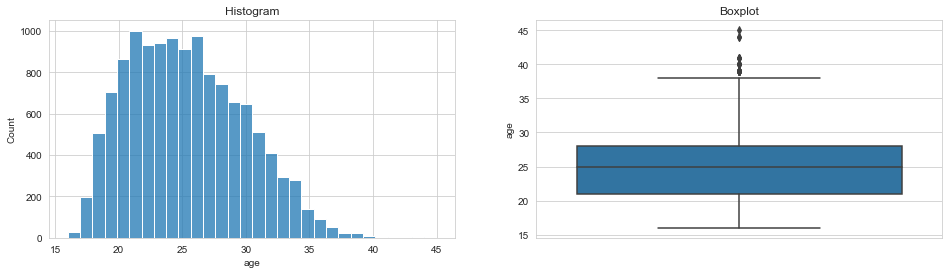


age - After Trimming


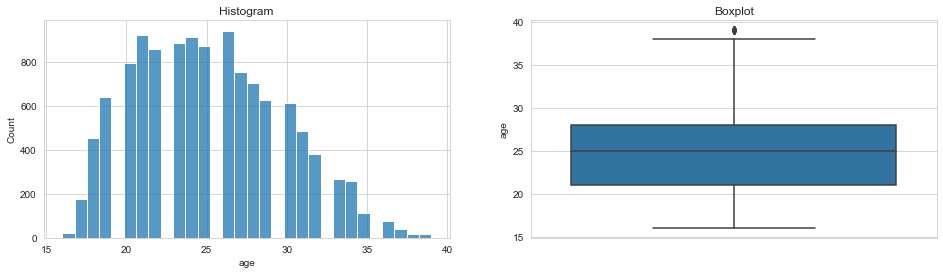

dribbling - Before capping


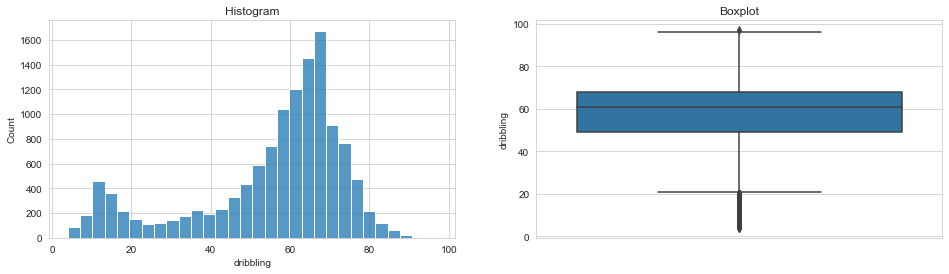


dribbling - After capping


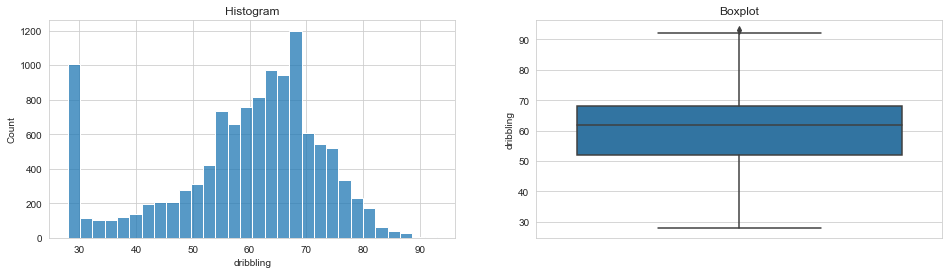

In [104]:
# Check Before Trimming/capping and after Trimming/capping feature `age` and `dribbling'

#Trimming
print('age - Before Trimming')
identify_plots(train, 'age') # features before trimming
print('\nage - After Trimming')
identify_plots(train_trimmed, 'age') # features after trimming

#Capping
print('dribbling - Before capping')
identify_plots(train, 'dribbling') # features before capping
print('\ndribbling - After capping')
identify_plots(train_trimmed, 'dribbling') # features after capping

From the results of plotting the data above, it has been confirmed that the Outliers data has been handled

## Pipeline for Scalling and Encoding

In [105]:
# Define Target

# for Train data
X_train = train.drop(columns=['wage']) #features
y_train = train['wage'] #Target

# for Test data
X_test = test.drop(columns=['wage']) #features
y_test = test['wage'] #Target

In [106]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12707, 39)
(12707,)
(5442, 39)
(5442,)


In [107]:
# Creating Numerical and Categorical Columns

num_col = X_train.select_dtypes(include=np.number).columns.tolist() 
cat_col = X_train.select_dtypes(include='object').columns.tolist()

cat_col,num_col

(['preferred_foot'],
 ['age',
  'overall',
  'potential',
  'value',
  'international_reputation',
  'weak_foot',
  'skill_moves',
  'height',
  'weight',
  'crossing',
  'finishing',
  'headingaccuracy',
  'shortpassing',
  'volleys',
  'dribbling',
  'curve',
  'fkaccuracy',
  'longpassing',
  'ballcontrol',
  'acceleration',
  'sprintspeed',
  'agility',
  'reactions',
  'balance',
  'shotpower',
  'jumping',
  'stamina',
  'strength',
  'longshots',
  'aggression',
  'interceptions',
  'positioning',
  'vision',
  'penalties',
  'composure',
  'marking',
  'standingtackle',
  'slidingtackle'])

In [109]:
# Pipeline for Numeric data type to handle scaling
numeric_prep = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')), #untuk dataset ini tidak memiliki Missing Value, seandainya fresh data yang dimasukan ada Missing Value jadi bisa otomatis terhandling
            ('scaler', StandardScaler())]
)
            # ('poly', PolynomialFeatures(degree=2))

# Pipeline for Cetgorical data type to handle encoding
Categorical_prep = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')), #untuk dataset ini tidak memiliki Missing Value, seandainya fresh data yang dimasukan ada Missing Value jadi bisa otomatis terhandling
            ('encode', OneHotEncoder())]
)

In [110]:
# Creating a combined Preprocessing Pipeline between numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_prep, num_col ),
        ('cat', Categorical_prep, cat_col)
    ]
)

# Model

In [112]:
# Creating 8 models in the pipeline


# Creating a Linear Regression Model
# The Linear Regression model and the preprocessing pipeline are incorporated into one Pipeline model
pipe_linreg = Pipeline([
    ('prep', preprocessor),
    ('linreg', LinearRegression())
])

# Creating a ridge Regression Model
# The ridge Regression model and the preprocessing pipeline are incorporated into one Pipeline model
pipe_ridge = Pipeline([
    ('prep', preprocessor),
    ('ridge', Ridge())
])

# Creating a Lasso Regression Model
# The Lasso Regression model and the preprocessing pipeline are incorporated into one Pipeline model
pipe_lasso = Pipeline([
    ('prep', preprocessor),
    ('lasso', Lasso())
])

# Creating a SGDRegressor Model
# The SGDRegressor model and the preprocessing pipeline are incorporated into one Pipeline model
pipe_sgd = Pipeline([
    ('prep', preprocessor),
    ('sgd', SGDRegressor())
])

# Creating a GradientBoostingRegressor Model
# The GradientBoostingRegressor model and the preprocessing pipeline are incorporated into one Pipeline model
pipe_gbreg = Pipeline([
    ('prep', preprocessor),
    ('gbreg', GradientBoostingRegressor())
])


# Creating a DecisionTreeRegressor Model
# The DecisionTreeRegressor model and the preprocessing pipeline are incorporated into one Pipeline model
pipe_dtreg = Pipeline([
    ('prep', preprocessor),
    ('dtreg', DecisionTreeRegressor())
])

# Creating a kernel ridge Model
# The kernel ridge model and the preprocessing pipeline are incorporated into one Pipeline model
pipe_kernel = Pipeline([
    ('prep', preprocessor),
    ('kernel', KernelRidge())
])

# Creating a ElasticNet Model
# The ElasticNet model and the preprocessing pipeline are incorporated into one Pipeline model
pipe_elastic = Pipeline([
    ('prep', preprocessor),
    ('elastic', ElasticNet())
])

# Creating a XGBRegressor Model
# The XGBRegressor model and the preprocessing pipeline are incorporated into one Pipeline model
pipe_xgb = Pipeline([
    ('prep', preprocessor),
    ('xgb', XGBRegressor())
])

In [113]:
#The models is created in a list for looping

MLA = [
       pipe_linreg,
       pipe_ridge,
       pipe_lasso,
       pipe_sgd,
       pipe_gbreg,
       pipe_dtreg,
       pipe_kernel,
       pipe_elastic,
       pipe_xgb       
]

In [114]:
#looping train model and evaluation model
name = []
R_squared_train = []
R_squared_test = []
mae = []
mse = []
rmse = []
for alg in MLA:
    name.append(alg.steps[1][1].__class__.__name__)
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_test = alg.predict(X_test)
    R_squared_train.append(metrics.r2_score(y_train,  y_pred_train))
    R_squared_test.append(metrics.r2_score(y_test,  y_pred_test))
    mae.append(metrics.mean_absolute_error(y_test, y_pred_test))
    mse.append(metrics.mean_squared_error(y_test, y_pred_test))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

compare = pd.DataFrame({'Name': name, 'R Squared Train': R_squared_train, 'R Squared Test': R_squared_test, 'MAE Score': mae, 'MSE Score': mse, 'RMSE Score': rmse})

In [115]:
compare.sort_values(by = 'R Squared Test', ascending=False)

,Name,R Squared Train,R Squared Test,MAE Score,MSE Score,RMSE Score
4,GradientBoostingRegressor,0.885949,0.736722,4580.275433,1.107605e+08,10524.281969
2,Lasso,0.772119,0.732237,4878.265944,1.126470e+08,10613.530139
6,KernelRidge,0.772120,0.732237,4880.509518,1.126472e+08,10613.536666
1,Ridge,0.772120,0.732236,4880.725637,1.126478e+08,10613.564600
0,LinearRegression,0.772120,0.732224,4880.959060,1.126528e+08,10613.800411
3,SGDRegressor,0.768010,0.724961,5028.229026,1.157083e+08,10756.779681
8,XGBRegressor,0.984386,0.708219,4793.568264,1.227514e+08,11079.325310
7,ElasticNet,0.708169,0.702900,5518.617736,1.249890e+08,11179.848431
5,DecisionTreeRegressor,1.000000,0.452470,6316.611540,2.303442e+08,15177.093758


-   From the results of the evaluation of the model above, based on the R Square test the highest is GradienBoostingRegressor but the model is too overfit
-   Lasso, KernelRidge, Ridge and Linear Regression have almost the same RSquared test.
-   So what I will do Hyperparameter tuning is GradienBoostingRegressor, Linear Regression and Ridge because I think that each feature has high Multicollinearity.

## Hyperparameter Tuning

In [117]:
from sklearn.model_selection import GridSearchCV

### hyperparameter tuning Gradient Boosting Regression

In [122]:
param_grid_gbreg = [
    {
    'gbreg__n_estimators': [100, 200, 500],
    'gbreg__max_depth': [3,4,6],
    'gbreg__min_samples_split': [2,3],
    'gbreg__learning_rate': [0.01,0.05,0.1]
    }
]

In [123]:
#Teknik GridSearchCV dengan 3x cross validation
reg_gbreg = GridSearchCV(pipe_gbreg, param_grid = param_grid_gbreg, cv = 3, verbose=True, n_jobs=-1)

#train GridSearchCV terhadap dataset
best_reg_gbreg = reg_gbreg.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [124]:
best_reg_gbreg.best_params_

{'gbreg__learning_rate': 0.05,
 'gbreg__max_depth': 3,
 'gbreg__min_samples_split': 2,
 'gbreg__n_estimators': 100}

In [125]:
best_reg_gbreg.best_score_

0.7925352534921467

### hyperparameter tuning linear regression

In [127]:
#membuat list parameter yang akan diseleksi menggunakan teknik GridSearhCV
param_grid_linreg = [
    {
    'linreg__fit_intercept': ['True', 'False']
    }
]

In [128]:
#Teknik GridSearchCV dengan 3x cross validation
reg_linreg = GridSearchCV(pipe_linreg, param_grid = param_grid_linreg, cv = 3, verbose=True, n_jobs=-1)

#train GridSearchCV terhadap dataset
best_reg_linreg = reg_linreg.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [129]:
best_reg_linreg.best_params_

{'linreg__fit_intercept': 'True'}

In [130]:
best_linreg = best_reg_linreg.best_estimator_

### hyperparameter tuning ridge

In [131]:
#membuat list parameter yang akan diseleksi menggunakan teknik GridSearhCV
param_grid_ridge = [
    {
    'ridge__alpha': [0.02, 0.024, 0.025, 0.026, 0.03],
    'ridge__solver': ['auto','saga', 'lbfgs']
    }
]

In [132]:
#Teknik GridSearchCV dengan 3x cross validation
reg_ridge = GridSearchCV(pipe_ridge, param_grid = param_grid_ridge, cv = 3, verbose=True, n_jobs=-1)

#train GridSearchCV terhadap dataset
best_reg_ridge = reg_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [133]:
print(best_reg_ridge.best_score_)
print(best_reg_ridge.best_params_)

0.7668840766315208
{'ridge__alpha': 0.03, 'ridge__solver': 'saga'}


In [134]:
best_ridge = best_reg_ridge.best_estimator_

I created a list for a machine learning model that has been hyperparameter tuning. Then I will compare each model.

In [135]:
# train models that have been tuning parameters and see the results of the model evaluation
ML_best = [best_ridge, best_linreg, best_gbreg]


name = []
R_squared_train = []
R_squared_test = []
mae = []
mse = []
rmse = []
for alg in ML_best:
    name.append(alg.steps[1][1].__class__.__name__)
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_test = alg.predict(X_test)
    R_squared_train.append(metrics.r2_score(y_train,  y_pred_train))
    R_squared_test.append(metrics.r2_score(y_test,  y_pred_test))
    mae.append(metrics.mean_absolute_error(y_test, y_pred_test))
    mse.append(metrics.mean_squared_error(y_test, y_pred_test))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

compare_best_model = pd.DataFrame({'Name': name, 'R Squared Train': R_squared_train, 'R Squared Test': R_squared_test, 'MAE Score': mae, 'MSE Score': mse, 'RMSE Score': rmse})

In [136]:
compare_best_model.sort_values(by = 'R Squared Test', ascending=False)

,Name,R Squared Train,R Squared Test,MAE Score,MSE Score,RMSE Score
2,GradientBoostingRegressor,0.863955,0.742422,4625.124286,1.083623e+08,10409.721065
0,Ridge,0.772120,0.732233,4879.992149,1.126489e+08,10613.617021
1,LinearRegression,0.772120,0.732224,4880.959060,1.126528e+08,10613.800411


Based on the results, I chose Ridge as the best model because the GradientBoostingRegressor is indeed 0.01 higher but the GBreg model is too overfit. Indeed, the results of the model I made do not have a high RSquared.
  
As additional info, apart from tuning parameters, I perform other model optimizations, such as selecting features with fewer but only very high correlations, performing polynomial features, handling outliers, using PCA and others. However, the result remains the same around 0.72-0.74.  

I got the best model is Ridge without handling Outliers get RSquared Test 0.73 and not too overfit compared to other models.

# Conclussion

### Model  
The model with this dataset I find it difficult to optimize the RSquared Test higher. I have compared using polynomialfeatures or not, handling outliers or not, trying to use PCA, varying the scaling method, but the models with my dataset still find it difficult to improve their performance. But in this case, only to estimate the right wage range to be considered in negotiations, I think this model can help.

### EDA
Based on the project the club manager wants to do by investing in young players it's brilliant. Because it can be seen from plotting data that indeed those who have a young age have high potential, thus when the overall ability increases, there will be high demand from top European clubs to bring in these young players with high values.

# Save Model

Save the regression prediction model, for deployment.

In [137]:
import pickle

In [138]:
with open('model_ridge.pkl', 'wb') as pipe_model:
    pickle.dump(best_ridge, pipe_model)

In [141]:
X_train.head(5)

,preferred_foot,age,overall,potential,value,international_reputation,weak_foot,skill_moves,height,weight,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle
17387,Right,24,54,59,70000.0,1.0,2.0,1.0,195.0,88.0,16.0,4.0,12.0,20.0,8.0,6.0,15.0,12.0,22.0,11.0,21.0,22.0,34.0,45.0,27.0,20.0,40.0,31.0,78.0,8.0,16.0,14.0,4.0,33.0,17.0,38.0,7.0,14.0,16.0
3388,Right,31,72,72,2800000.0,1.0,4.0,3.0,180.0,72.0,49.0,68.0,76.0,68.0,70.0,67.0,46.0,55.0,55.0,77.0,75.0,68.0,80.0,68.0,75.0,69.0,68.0,69.0,66.0,70.0,74.0,34.0,77.0,76.0,71.0,73.0,26.0,21.0,23.0
5284,Left,26,70,71,2100000.0,1.0,3.0,3.0,174.0,70.0,59.0,59.0,49.0,68.0,64.0,74.0,71.0,60.0,63.0,73.0,82.0,81.0,91.0,64.0,90.0,65.0,59.0,69.0,54.0,69.0,51.0,31.0,61.0,66.0,57.0,64.0,28.0,22.0,23.0
16442,Right,18,57,77,170000.0,1.0,2.0,1.0,192.0,70.0,12.0,9.0,11.0,28.0,6.0,8.0,11.0,11.0,23.0,17.0,28.0,33.0,35.0,48.0,21.0,17.0,37.0,24.0,44.0,7.0,23.0,8.0,5.0,35.0,14.0,40.0,8.0,14.0,13.0
8936,Right,23,66,72,875000.0,1.0,3.0,3.0,168.0,65.0,44.0,41.0,27.0,71.0,48.0,65.0,47.0,50.0,66.0,66.0,65.0,61.0,82.0,56.0,80.0,74.0,31.0,90.0,43.0,70.0,61.0,54.0,64.0,58.0,51.0,58.0,56.0,65.0,59.0


In [140]:
talent_player.iloc[6]

,unnamed:_0,id,name,age,photo,nationality,flag,overall,potential,club,club_logo,value,wage,special,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,position,jersey_number,joined,loaned_from,contract_valid_until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release_clause
0,226,235243,M. de Ligt,18,https://cdn.sofifa.org/players/4/19/235243.png,Netherlands,https://cdn.sofifa.org/flags/34.png,82,91,Ajax,https://cdn.sofifa.org/teams/2/light/245.png,27000000.0,11000.0,1937,Right,2.0,4.0,2.0,Medium/ Medium,Normal,Yes,RCB,3.0,"Oct 24, 2016",NaN,2021,189.0,89.0,66+2,66+2,66+2,63+2,65+2,65+2,65+2,63+2,65+2,65+2,65+2,65+2,70+2,70+2,70+2,65+2,73+2,77+2,77+2,77+2,73+2,75+2,80+2,80+2,80+2,75+2,57.0,53.0,81.0,75.0,40.0,65.0,48.0,55.0,72.0,73.0,62.0,72.0,56.0,77.0,59.0,79.0,80.0,74.0,87.0,64.0,79.0,79.0,44.0,63.0,40.0,77.0,84.0,84.0,79.0,12.0,11.0,11.0,12.0,10.0,€43.2M
1,1004,233049,J. Sancho,18,https://cdn.sofifa.org/players/4/19/233049.png,England,https://cdn.sofifa.org/flags/14.png,77,89,Borussia Dortmund,https://cdn.sofifa.org/teams/2/light/22.png,14500000.0,22000.0,1785,Right,1.0,3.0,5.0,Medium/ Medium,Lean,No,RM,7.0,"Aug 31, 2017",NaN,2022,156.0,76.0,69+2,69+2,69+2,77+2,75+2,75+2,75+2,77+2,75+2,75+2,75+2,76+2,67+2,67+2,67+2,76+2,58+2,52+2,52+2,52+2,58+2,54+2,42+2,42+2,42+2,54+2,68.0,70.0,38.0,74.0,65.0,86.0,75.0,48.0,54.0,85.0,88.0,86.0,90.0,76.0,87.0,64.0,49.0,66.0,52.0,48.0,39.0,26.0,68.0,75.0,57.0,64.0,30.0,33.0,36.0,7.0,11.0,10.0,11.0,13.0,€27.6M
2,1143,238794,Vinícius Júnior,17,https://cdn.sofifa.org/players/4/19/238794.png,Brazil,https://cdn.sofifa.org/flags/54.png,77,92,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,17500000.0,66000.0,1849,Right,1.0,4.0,5.0,High/ Medium,Lean,No,LW,28.0,"Jul 12, 2018",NaN,2025,180.0,73.0,72+2,72+2,72+2,76+2,75+2,75+2,75+2,76+2,74+2,74+2,74+2,75+2,65+2,65+2,65+2,75+2,56+2,50+2,50+2,50+2,56+2,52+2,42+2,42+2,42+2,52+2,65.0,70.0,50.0,70.0,71.0,81.0,77.0,62.0,48.0,80.0,92.0,94.0,90.0,70.0,82.0,74.0,74.0,79.0,59.0,68.0,48.0,26.0,74.0,69.0,65.0,75.0,32.0,25.0,18.0,5.0,7.0,7.0,7.0,10.0,€46.8M
3,1800,235883,R. Sessegnon,18,https://cdn.sofifa.org/players/4/19/235883.png,England,https://cdn.sofifa.org/flags/14.png,75,88,Fulham,https://cdn.sofifa.org/teams/2/light/144.png,12000000.0,27000.0,1933,Left,1.0,3.0,4.0,High/ Medium,Lean,Yes,LM,3.0,"Aug 9, 2016",NaN,2020,155.0,70.0,71+2,71+2,71+2,75+2,74+2,74+2,74+2,75+2,73+2,73+2,73+2,75+2,71+2,71+2,71+2,75+2,72+2,68+2,68+2,68+2,72+2,71+2,65+2,65+2,65+2,71+2,71.0,75.0,55.0,74.0,55.0,74.0,54.0,31.0,63.0,76.0,85.0,87.0,79.0,75.0,85.0,67.0,66.0,78.0,55.0,57.0,60.0,67.0,77.0,71.0,61.0,79.0,66.0,68.0,62.0,6.0,11.0,7.0,8.0,7.0,€30.3M
4,2640,241168,G. Chakvetadze,18,https://cdn.sofifa.org/players/4/19/241168.png,Georgia,https://cdn.sofifa.org/flags/20.png,73,86,KAA Gent,https://cdn.sofifa.org/teams/2/light/674.png,7000000.0,10000.0,1809,Right,1.0,3.0,3.0,Medium/ Medium,Lean,No,LM,7.0,"Aug 30, 2017",NaN,2020,155.0,75.0,66+2,66+2,66+2,72+2,71+2,71+2,71+2,72+2,72+2,72+2,72+2,72+2,67+2,67+2,67+2,72+2,57+2,53+2,53+2,53+2,57+2,53+2,43+2,43+2,43+2,53+2,67.0,64.0,39.0,75.0,64.0,76.0,74.0,59.0,69.0,75.0,86.0,83.0,86.0,65.0,77.0,73.0,76.0,64.0,51.0,70.0,38.0,30.0,65.0,71.0,58.0,61.0,29.0,41.0,32.0,10.0,8.0,13.0,8.0,13.0,€14.9M
5,2725,241461,Ferrán Torres,18,https://cdn.sofifa.org/players/4/19/241461.png,Spain,https://cdn.sofifa.org/flags/45.png,73,86,Valencia CF,https://cdn.sofifa.org/teams/2/light/461.png,7000000.0,12000.0,1704,Right,1.0,4.0,3.0,High/ Medium,Lean,No,RM,20.0,"Jul 1, 2017",NaN,2021,156.0,72.0,67+2,67+2,6